In [15]:
import os, sys
import re
import json
import glob

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
from datetime import datetime
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

In [14]:
rpath = os.path.abspath('./..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
from src.utils import get_messages_reply_timestamp_from_channel,get_channel_messages_replies_timestamp,find_reaction_timestamps,get_all_events_timestamp_on_channel

([['1669113675.453199', '1669113786.862139'], ['1668686977.825909', '1668691998.451149'], ['1668699121.610819', '1668699177.803519'], ['1668699301.600119', '1668699391.181839'], ['1667744090.571279', '1667747470.107709'], ['1667802239.012269', '1667802417.067239'], ['1665991121.357509', '1665991981.689139'], ['1665993448.186949', '1665993578.905459'], ['1665993522.920119', '1665998905.976049'], ['1665993646.927949', '1665998351.803639'], ['1665995244.899959', '1665997826.068939'], ['1666000876.330289', '1666001899.211839'], ['1666000950.216889', '1666001706.936009'], ['1666001072.834279', '1666001116.817059'], ['1666001139.463339', '1666001172.458489'], ['1666001222.757149', '1666003339.453369'], ['1666001249.595429', '1666010049.897989'], ['1666001374.637079', '1666005213.213829'], ['1666001457.160099', '1666001759.731679'], ['1666003075.781679', '1666003603.689479'], ['1666005351.654559', '1666006144.670409'], ['1666007660.836149', '1666008743.710829'], ['1666072103.227859', '1666162

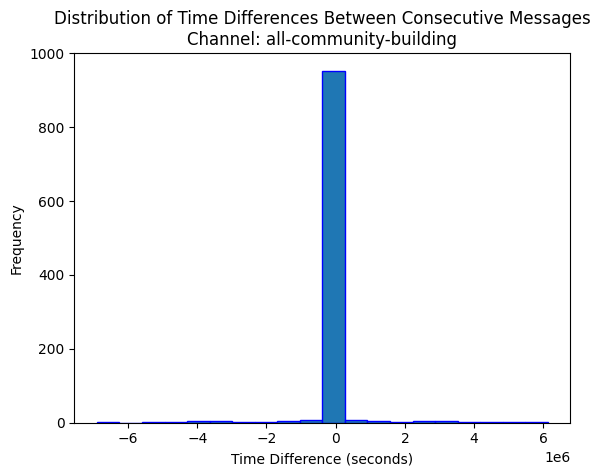

([['1665991331.193779', '1665995285.105619'], ['1663743887.128999', '1663744200.219819'], ['1663779188.326619', '1663779768.595429'], ['1663820517.674349', '1663836419.633159'], ['1665121097.450089', '1665128592.289799'], ['1665123681.452719', '1665124139.627949'], ['1662045970.903379', '1662046052.802009'], ['1666774909.890759', '1666789617.013279'], ['1666774928.070509', '1666774948.233829'], ['1663666829.170849', '1663686236.823379'], ['1661761179.568549', '1661761744.523529'], ['1661761407.846619', '1661955073.663599'], ['1665492210.321109', '1665566124.913179'], ['1661503838.987009', '1661503989.751589'], ['1661505027.543439', '1661510013.384439'], ['1661517817.313939', '1661521007.174679'], ['1661523625.707279', '1661525673.863619'], ['1661523747.193249', '1661524727.649399'], ['1663578061.272249', '1663588423.186049'], ['1661628729.184579', '1661752632.912279'], ['1664538465.710309', '1664538539.028329'], ['1662214499.920299', '1662219617.741619'], ['1662397522.743609', '1662398

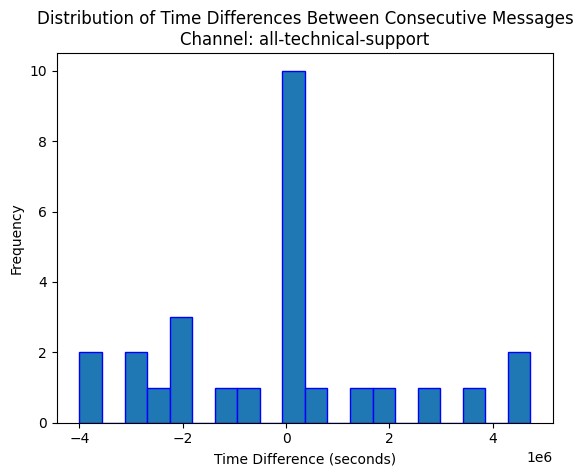

([['1669138840.956939', '1669143702.257599'], ['1664884962.530969', '1664885191.484329'], ['1663749866.980199', '1663752630.815629'], ['1663756180.266899', '1663778201.954489'], ['1663763155.449869', '1663765319.846689'], ['1663778359.189199', '1663778493.227629'], ['1665048164.313429', '1665050868.099649'], ['1665050553.497249', '1665051771.978559'], ['1665058913.422569', '1665059803.469049'], ['1665059250.102969', '1665061473.571509'], ['1665059781.006929', '1665130400.692519'], ['1665059974.900249', '1665130427.190449'], ['1665059975.044559', '1665060084.227509'], ['1665060275.417059', '1665061750.505909'], ['1665060435.195939', '1665060519.195589'], ['1665060449.933229', '1665060954.437759'], ['1665060556.620569', '1665060709.254689'], ['1665060636.345599', '1665060879.758469'], ['1665060774.314009', '1665061397.168429'], ['1665060924.905129', '1665061379.290899'], ['1665061837.403859', '1665062008.768479'], ['1665061939.192459', '1665064201.371629'], ['1665062360.049469', '1665117

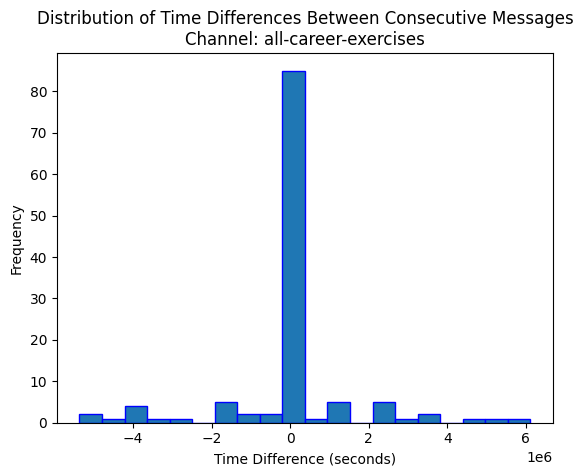

([['1665991025.246179', '1665991130.478349'], ['1662540576.935619', '1662541909.206289'], ['1662618089.387919', '1662625658.058949'], ['1663778404.557969', '1663778595.457009'], ['1663795204.234309', '1663920768.607389'], ['1664201174.577239', '1664478079.200589'], ['1664455013.513149', '1664455783.907489'], ['1664455437.321059', '1664455737.603529'], ['1664457863.244849', '1664460486.505119'], ['1664458858.215039', '1664460514.489849'], ['1664459973.212959', '1664460471.106709'], ['1664460609.604809', '1664460633.415669'], ['1664463369.912189', '1664463415.328759'], ['1666285582.271029', '1666299873.656039'], ['1666777584.829249', '1666781308.485289'], ['1666823878.065449', '1666859764.621939'], ['1666763747.284529', '1666763892.483629'], ['1663664569.990199', '1663666049.040219'], ['1663705514.133889', '1663706808.408719'], ['1661759566.047639', '1661759960.701819'], ['1663241706.286929', '1663244234.347619'], ['1665483449.070439', '1665484398.392839'], ['1666166557.288679', '1666169

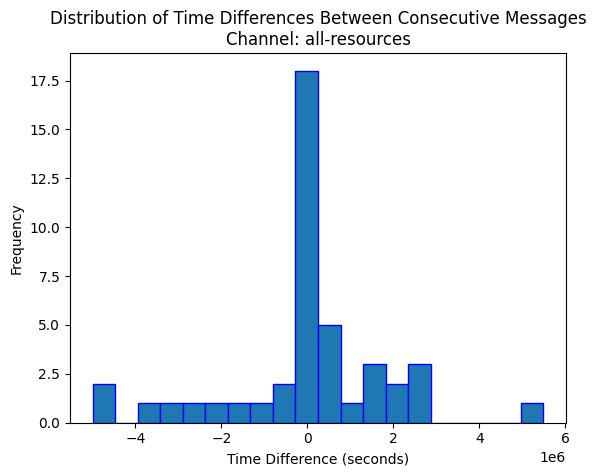

([['1668698021.231339', '1668698595.185849'], ['1666029087.689579', '1666032967.552859'], ['1662576276.715449', '1662578596.558729'], ['1663746756.076749', '1663747328.094699'], ['1665351105.741029', '1665419700.397789'], ['1664196946.198389', '1664197153.972869'], ['1664198352.063929', '1664254678.495269'], ['1664198370.413819', '1664198621.214919'], ['1664209902.569039', '1664211521.502779'], ['1665053279.914729', '1665055187.516929'], ['1663410231.750509', '1663414287.839399'], ['1668165850.897869', '1668165935.180479'], ['1662974358.280409', '1663078217.393929'], ['1668834770.327959', '1668837548.542759'], ['1666778289.497499', '1666785777.123619'], ['1666817632.431519', '1666817826.938689'], ['1666850709.603689', '1666851601.910189'], ['1662845934.313849', '1662847489.907209'], ['1666634490.831609', '1666634820.124209'], ['1666997056.103519', '1666997584.818109'], ['1665476681.303309', '1665492331.146609'], ['1665510068.864169', '1665515493.038799'], ['1668414942.008319', '1668415

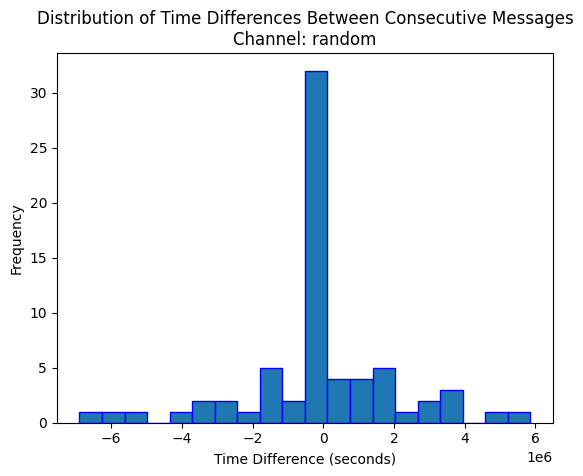

([['1668751717.223689', '1668757126.289979'], ['1663820158.211559', '1663953193.430599'], ['1665321648.188089', '1665347095.294529'], ['1661113258.628419', '1661173353.513789'], ['1665123672.347859', '1665139664.479959'], ['1662100692.242049', '1662101284.167329'], ['1666607639.461199', '1666607855.027919'], ['1667715260.610329', '1667801241.745569'], ['1665664718.241179', '1666095633.021589'], ['1664289348.048449', '1664346834.980449'], ['1665004374.957939', '1665004674.203289'], ['1668084831.672939', '1668142812.024599'], ['1662368965.640779', '1662382865.682979'], ['1661270930.891049', '1661286564.803039'], ['1661323786.478879', '1661546046.130229'], ['1661339444.083019', '1661341259.983349'], ['1663055834.765049', '1663129146.014529'], ['1664359667.485969', '1664359847.357719'], ['1666900816.202839', '1667994836.677459'], ['1666452783.647959', '1666454215.495979'], ['1661170932.296559', '1661171309.516579'], ['1661192341.506959', '1661197330.840809'], ['1661199137.730359', '1661199

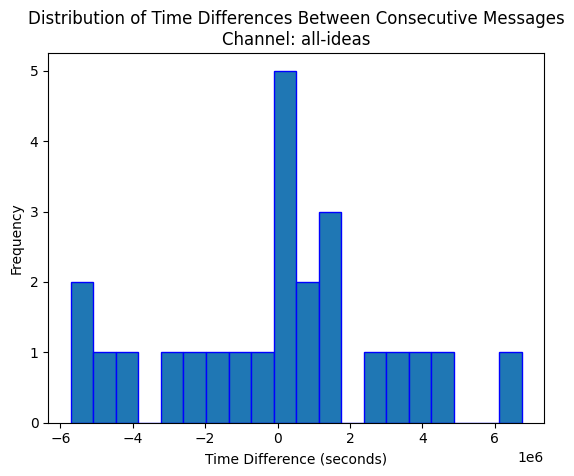

([['1661413141.333999', '1661413191.727669'], ['1661413207.776949', '1661413491.911979'], ['1661418826.065749', '1661419171.060219'], ['1661423075.584399', '1661424538.664509'], ['1661426369.859829', '1661428505.646659'], ['1661426750.680949', '1661436050.217269'], ['1661440505.831539', '1661450939.737479'], ['1661451310.312569', '1661451593.050669'], ['1661451551.074739', '1661494027.744619'], ['1661452626.763289', '1661454555.532449'], ['1661499578.568379', '1661526101.609229'], ['1661503227.480699', '1661505284.020299'], ['1661505253.078859', '1661510008.365039'], ['1661505290.581149', '1661527623.393139'], ['1661506666.913679', '1661506743.117269'], ['1661508203.657499', '1661508268.753829'], ['1661516090.238719', '1661516813.361089'], ['1661523387.610829', '1661525125.706119'], ['1661524743.201779', '1661535631.430329'], ['1661533995.118179', '1661534131.480319'], ['1661538089.273299', '1661538356.008169'], ['1661538247.155559', '1661538393.661259'], ['1661542522.572009', '1661583

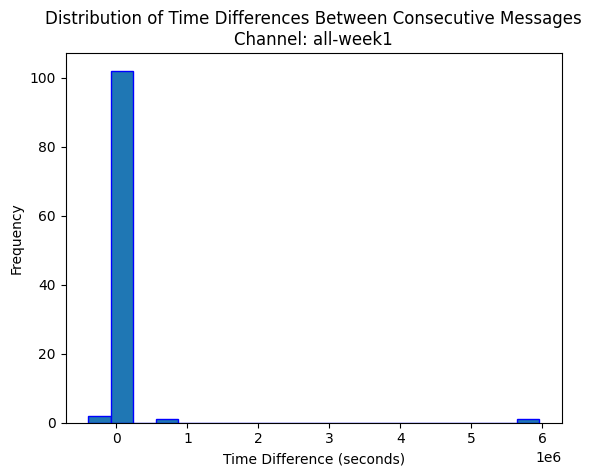

([['1668690184.402009', '1668690571.638409'], ['1667753910.325139', '1667757672.268159'], ['1664887800.515989', '1664888844.832109'], ['1664182200.994309', '1664182991.133669'], ['1665042600.304609', '1665043854.804149'], ['1664455800.706409', '1664456596.830269'], ['1666777559.617789', '1666783766.109549'], ['1666778179.186469', '1666781396.917569'], ['1666595574.092679', '1666783866.416029'], ['1663667400.542449', '1663667802.792659'], ['1666947000.857389', '1666951454.517139'], ['1667893114.347659', '1667981011.517529'], ['1663146124.231049', '1663146820.139039'], ['1665473336.819169', '1665485200.937679'], ['1666345800.304519', '1666347953.779499'], ['1663923030.698099', '1663927387.058399'], ['1663927500.813549', '1665140233.719849'], ['1665937180.750959', '1666002675.177879'], ['1664532199.516909', '1664533745.218139'], ['1664533200.766979', '1664533292.872029'], ['1664974201.006059', '1664975239.742409'], ['1668153000.666799', '1668153398.663049'], ['1662195527.771169', '1662203

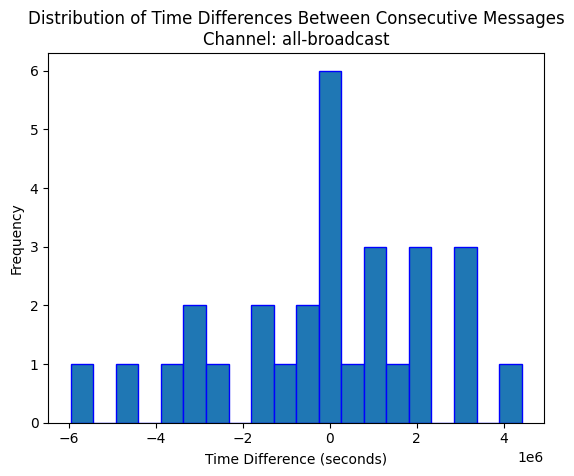

([], 4)


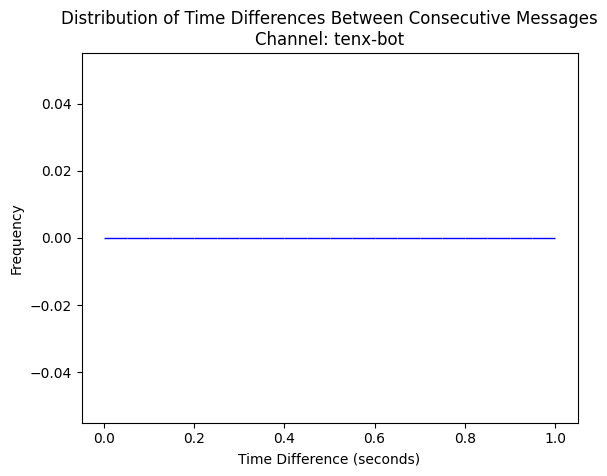

([['1662043148.385749', '1662045245.174359'], ['1662098147.170319', '1662117293.510119'], ['1661769087.017229', '1661769100.544319'], ['1661769240.277709', '1661769265.246379'], ['1661769521.544319', '1661769594.743619'], ['1661770097.145759', '1661770116.218699'], ['1661770380.484899', '1661770632.604229'], ['1661770754.642429', '1661770844.647929'], ['1661770852.453929', '1661770884.046399'], ['1661770895.975399', '1661770945.028739'], ['1661771056.905499', '1661771098.257709'], ['1661771072.827219', '1661771120.350049'], ['1661771555.543589', '1661771600.936659'], ['1661772821.093029', '1661773604.385229'], ['1661773648.555719', '1661774022.853949'], ['1661774048.542449', '1661790297.700129'], ['1661784493.334189', '1661787808.121879'], ['1662108215.472549', '1662148035.343789'], ['1662205276.660269', '1662205853.966959'], ['1662205641.734149', '1662205936.313399'], ['1661845812.720709', '1661845932.239709'], ['1661845929.870219', '1661846008.658829'], ['1661849764.471129', '1661854

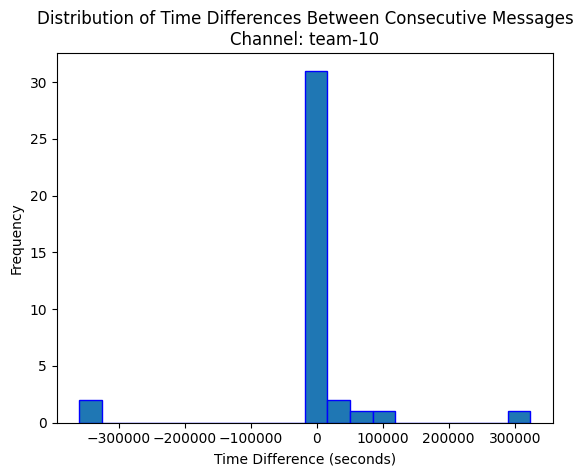

([['1662021768.029959', '1662037816.298669'], ['1662021836.909649', '1662025755.760039'], ['1662024779.341389', '1662025920.672179'], ['1662028009.272199', '1662031019.979349'], ['1662036836.979539', '1662044256.681299'], ['1662043149.372669', '1662068816.681249'], ['1662043249.126819', '1662047384.929569'], ['1662046077.444499', '1662059469.420259'], ['1662055513.774459', '1662142585.700099'], ['1662058410.501289', '1662059524.991519'], ['1662060181.968219', '1662074162.620539'], ['1662066711.351919', '1662067433.764709'], ['1662069471.633329', '1662073536.391609'], ['1662073315.332009', '1662477316.800639'], ['1661761718.447639', '1661761948.495639'], ['1661764062.292129', '1661766489.767639'], ['1661782721.682789', '1661799839.942859'], ['1661833976.862829', '1661836798.312349'], ['1662115179.308949', '1662115985.744229'], ['1662116984.310629', '1662123890.164819'], ['1662117806.023369', '1662133321.904689'], ['1662128918.568099', '1662187916.150329'], ['1662146086.372279', '1662187

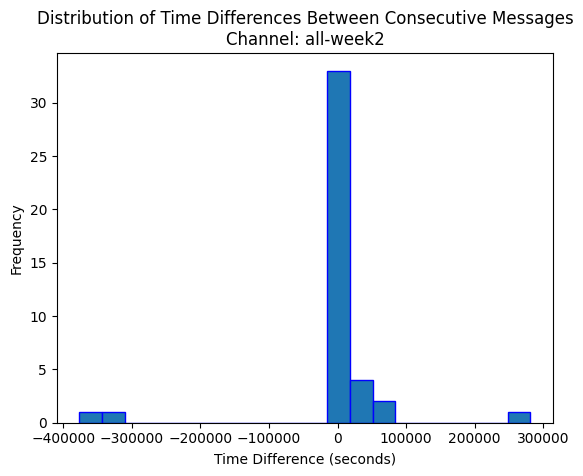

([], 5)


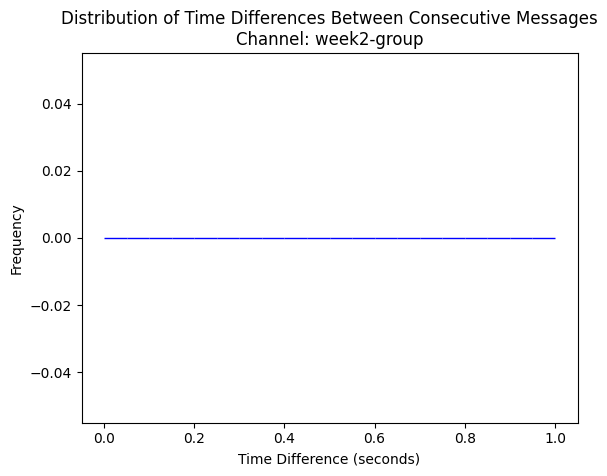

([['1662043373.638509', '1662043460.607899'], ['1662102285.912039', '1662102521.994679'], ['1662131754.966109', '1662131857.321039'], ['1662132291.364199', '1662132386.616629'], ['1662132391.421099', '1662132545.055769'], ['1661889106.885389', '1661889331.943819']], 567)


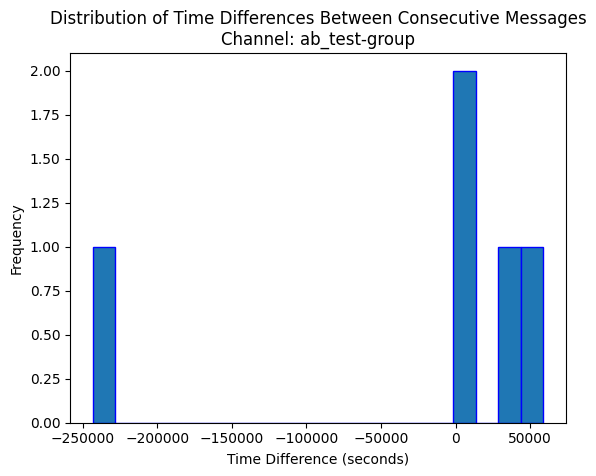

([['1661771479.063069', '1661771868.842979'], ['1661772421.212039', '1661774004.576799']], 78)


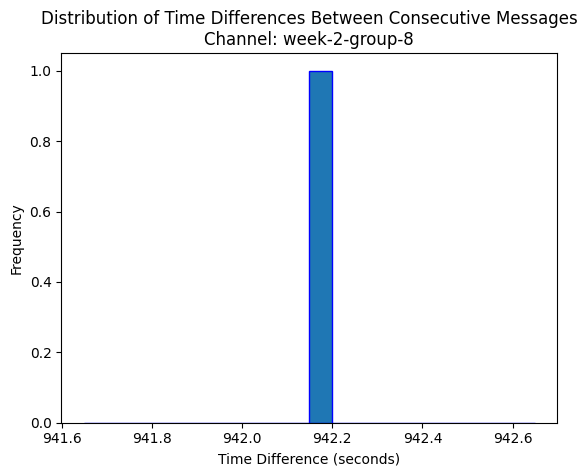

([['1662016167.500509', '1662024727.442199'], ['1662754492.810989', '1662795814.725079'], ['1663925055.445839', '1663926012.732709'], ['1662110229.399029', '1662110888.727599'], ['1665130235.396599', '1665136775.784549'], ['1663326015.493589', '1663327099.703599'], ['1663326151.504029', '1663329153.364169'], ['1667550692.003889', '1667550832.029459']], 127)


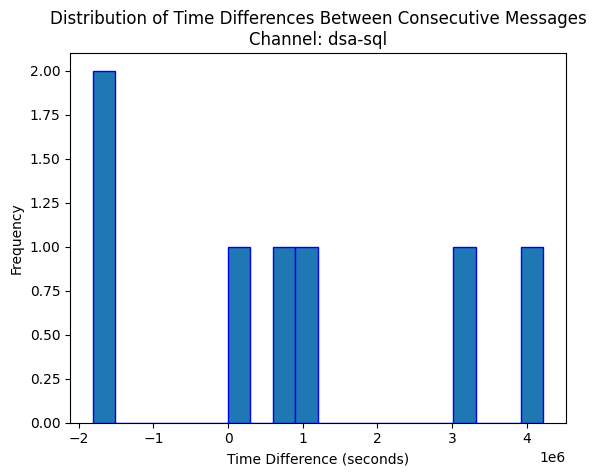

([['1662539462.808129', '1662541472.417099'], ['1662542789.347139', '1662552747.793039'], ['1662557073.152429', '1662559925.608789'], ['1662571762.902419', '1662636801.647099'], ['1662572486.266349', '1662626948.176719'], ['1662801549.344979', '1662806897.464979'], ['1662801742.323469', '1662802126.047979'], ['1662808530.183889', '1662811911.107549'], ['1662811694.733239', '1662819359.552079'], ['1662813364.006719', '1662813760.683969'], ['1662821117.515769', '1662821847.012389'], ['1662821534.724499', '1662821908.173659'], ['1662825401.247329', '1662826796.072469'], ['1662840842.871199', '1662886814.283949'], ['1662708766.558739', '1662711063.142079'], ['1662715888.889809', '1662725347.474759'], ['1662732773.901799', '1662734822.285099'], ['1662737601.139009', '1662737891.715679'], ['1662738968.812269', '1662739207.625209'], ['1662749286.498939', '1662751061.806419'], ['1662750800.651429', '1662792736.423589'], ['1662754537.015619', '1662758123.387579'], ['1662361235.278469', '1662361

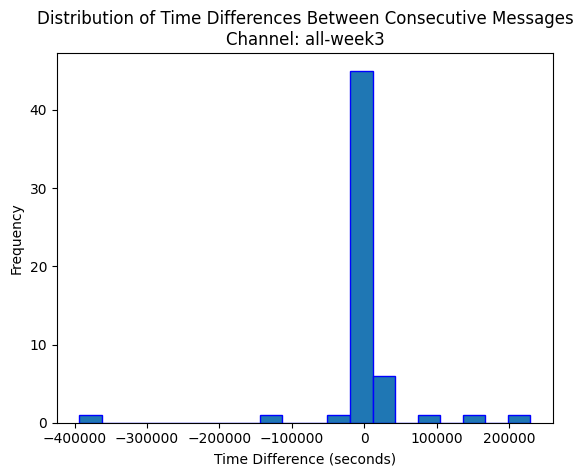

([['1662983714.894139', '1662985855.880149']], 85)


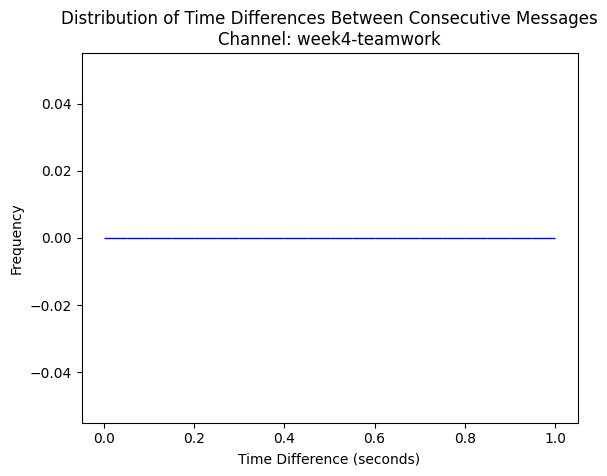

([['1663151073.400859', '1663154349.239879']], 53)


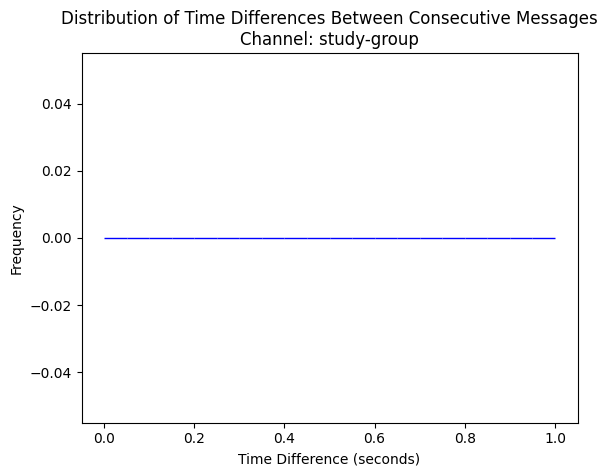

([['1663143073.964589', '1663143272.557109'], ['1663143238.285199', '1663143689.212799'], ['1663143451.486299', '1663144295.794219'], ['1663071756.151569', '1663076788.105579']], 97)


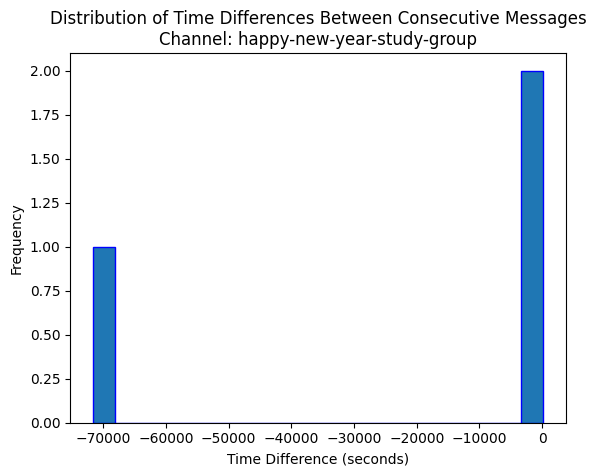

([['1664183003.584899', '1664197215.911939'], ['1664197292.152259', '1664366553.792089'], ['1663433196.477239', '1663436191.536539'], ['1662974567.633699', '1662979362.320029'], ['1662974784.306619', '1662978262.224169'], ['1662991519.517079', '1662998532.379299'], ['1662994843.394659', '1663050017.656079'], ['1662996758.713719', '1662999633.789109'], ['1663230814.494769', '1663233889.202549'], ['1663233068.820589', '1663301989.601939'], ['1663238800.859469', '1663238813.132089'], ['1663246220.705189', '1663246649.621559'], ['1663246398.644329', '1663287082.625109'], ['1663267272.464089', '1663312696.183859'], ['1663145743.087849', '1663238634.273009'], ['1663145914.649449', '1663153962.506529'], ['1663177181.412569', '1663178618.172289'], ['1663181243.117559', '1663183840.478189'], ['1663182768.412419', '1663188849.396669'], ['1663183121.104059', '1663236502.122489'], ['1663184637.516509', '1663236215.766539'], ['1663185462.466709', '1663185543.720739'], ['1663186513.299989', '1663228

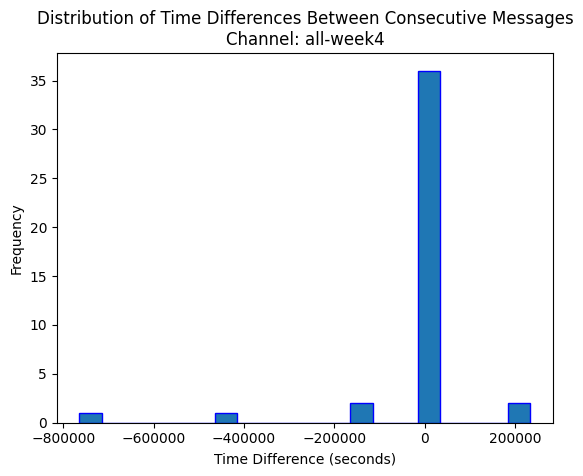

([], 6)


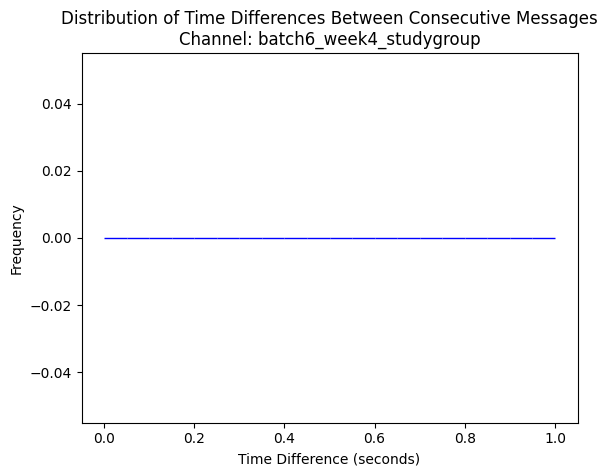

([['1663749043.494009', '1663756976.950669'], ['1663751500.316269', '1663751546.303399'], ['1663751585.154659', '1663752763.414139'], ['1663751978.894769', '1663752211.256229'], ['1663758420.033999', '1663836215.295839'], ['1663760077.550679', '1663760263.758769'], ['1663760670.225589', '1663786311.198759'], ['1663766640.975809', '1663777143.814019'], ['1663768110.484309', '1663777464.854029'], ['1663768750.515439', '1663780529.770179'], ['1663770636.192719', '1663770698.770489'], ['1663770760.921469', '1663772199.284889'], ['1663771089.600929', '1663780026.407039'], ['1663772338.916889', '1663772417.639529'], ['1663775050.131929', '1663831714.811179'], ['1663776821.245789', '1663776978.367939'], ['1663785823.683539', '1663786314.382509'], ['1663787258.621299', '1663848448.660409'], ['1663791594.922069', '1663826273.101989'], ['1663674802.925949', '1663692639.476969'], ['1663685616.917499', '1663686802.557529'], ['1663698868.829539', '1663755939.268469'], ['1663717671.776789', '1663740

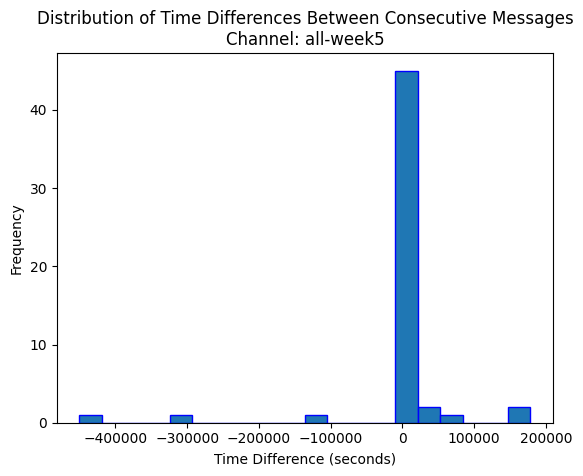

([['1664177876.695869', '1664179127.942949'], ['1664184280.429399', '1664184963.291199'], ['1664191096.963859', '1664280218.544469'], ['1664193663.286219', '1664193832.321899'], ['1664194714.660589', '1664269142.933059'], ['1664195809.056589', '1664210708.781739'], ['1664200568.609479', '1664201152.050389'], ['1664201664.699379', '1664203043.000609'], ['1664201741.843509', '1664202111.091389'], ['1664202874.560349', '1664212601.518209'], ['1664203512.532319', '1664367709.601529'], ['1664208361.636889', '1664208445.774599'], ['1664211162.635399', '1664215707.203529'], ['1664219173.139829', '1664266281.671589'], ['1664226823.106129', '1664277337.325219'], ['1664232961.243099', '1664290297.537689'], ['1664261347.402779', '1664277667.349749'], ['1664439863.182199', '1664446115.063829'], ['1664446967.899969', '1664451004.038599'], ['1664451932.370699', '1664452108.370389'], ['1664452096.851839', '1664608048.273179'], ['1664456517.398679', '1664472857.751259'], ['1664456542.711129', '1664456

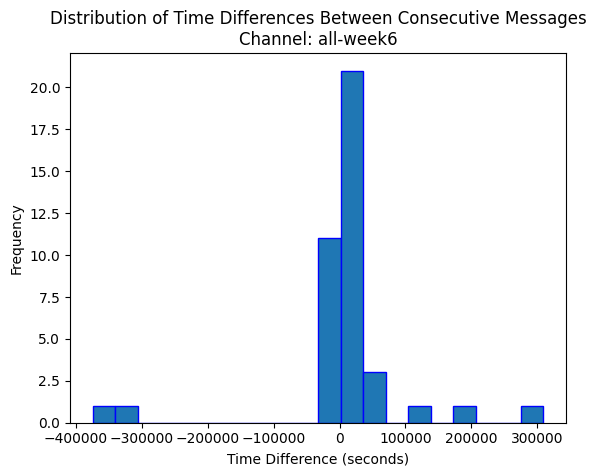

([['1664870234.632989', '1664871070.206159'], ['1664870791.106949', '1664873347.594039'], ['1664871253.838579', '1664872171.577889'], ['1664877869.140409', '1664878425.763169'], ['1664882139.489599', '1664882597.144499'], ['1664882244.939359', '1664882257.737389'], ['1664882761.610359', '1664883640.146099'], ['1664883474.571089', '1664883856.625919'], ['1664888569.216729', '1664889997.310979'], ['1664898525.374829', '1664898624.709499'], ['1664898564.658679', '1664899473.348379'], ['1664898619.984799', '1664899563.259059'], ['1664899654.976029', '1664900191.647599'], ['1664899983.317609', '1664902345.790979'], ['1664901468.866269', '1664943094.843999'], ['1664902116.859169', '1664902363.300169'], ['1664910520.303769', '1664911266.393399'], ['1664916135.399099', '1664957395.846539'], ['1664916746.043439', '1664920378.724399'], ['1664945160.900879', '1664947268.278209'], ['1664945758.790129', '1664953267.501999'], ['1664945833.574199', '1664969347.537159'], ['1664949958.404069', '1664954

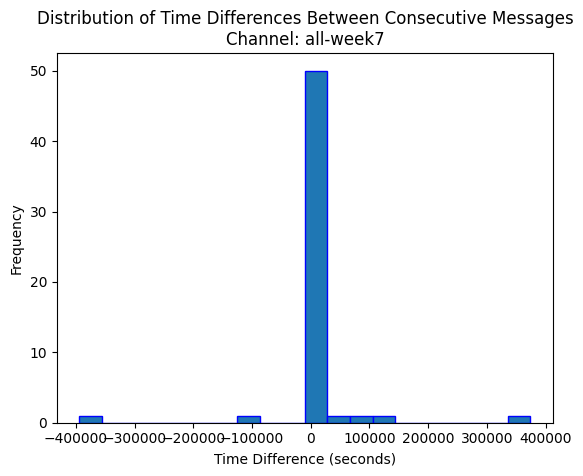

([['1664883612.041369', '1664883892.196899'], ['1664888217.895779', '1664891302.283899'], ['1664888250.872929', '1664891335.677819'], ['1664888302.324769', '1664891168.463709'], ['1664888840.677459', '1664889147.653299'], ['1664892123.957659', '1664898712.082699'], ['1664905411.380599', '1664905764.655139'], ['1664908348.624289', '1664908818.996039'], ['1664912831.549799', '1664920518.985369'], ['1664948635.524699', '1664951785.064689'], ['1664949740.720729', '1664950134.709419'], ['1664952213.025569', '1664952765.094669'], ['1665124882.713409', '1665126977.151749'], ['1665402252.179449', '1665404942.492119'], ['1665405130.041539', '1665405922.518769'], ['1665448647.071639', '1665478937.391709'], ['1665515415.543639', '1665518890.364589'], ['1665518630.591939', '1665518845.466379'], ['1665554551.754979', '1665554634.958029'], ['1665586105.661129', '1665598309.177789'], ['1665590309.773259', '1665607613.071199'], ['1664958736.527749', '1664958978.458359'], ['1664962666.372789', '1664962

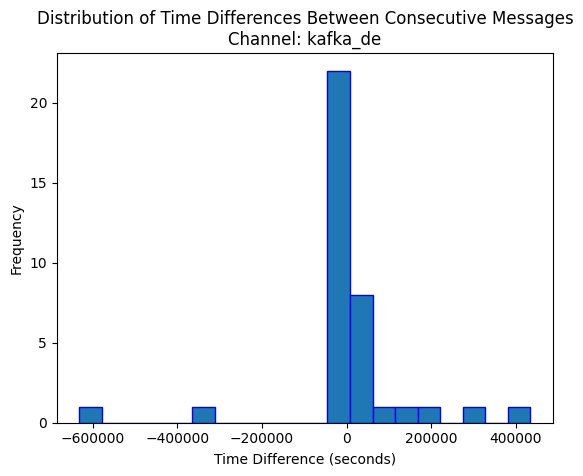

([['1665396091.818989', '1665426020.667739'], ['1665412261.292449', '1665412344.224389'], ['1665412350.628759', '1665414520.397339'], ['1665412703.494659', '1665421587.914539'], ['1665434032.507359', '1665467582.233329'], ['1665447406.723449', '1665448185.461419'], ['1665490319.589579', '1665490648.418599'], ['1665501880.342719', '1665558349.600599'], ['1665505715.758419', '1665507710.318549'], ['1665513700.897779', '1665524581.287339'], ['1665566115.858629', '1665568484.903069'], ['1665580935.055059', '1665581291.773299'], ['1665671064.872769', '1665671944.274899'], ['1665671213.446189', '1665684299.100249'], ['1665688834.338989', '1665730950.685009'], ['1665756107.060959', '1665756165.638109']], 121)


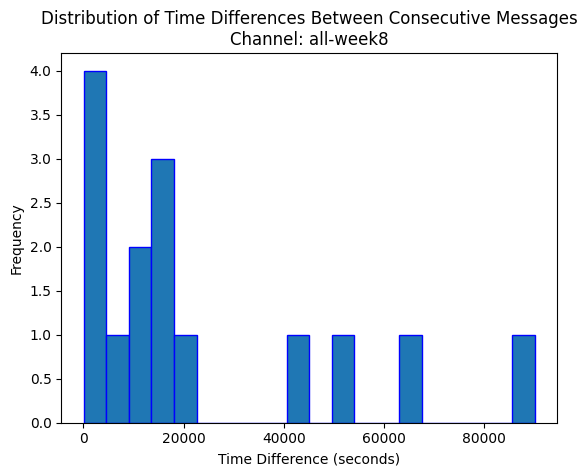

([['1666252118.086519', '1666252910.370849'], ['1666263788.522789', '1666264587.388439'], ['1666292418.438889', '1666292845.738119'], ['1666293417.408839', '1666335813.820309'], ['1666173062.008659', '1666243904.266079'], ['1666193972.590499', '1666358713.559869'], ['1666210049.595489', '1666214193.823399'], ['1666210433.816259', '1666285900.691219'], ['1666243918.977219', '1666264324.300969'], ['1666336083.356099', '1666336382.566209'], ['1666337890.778339', '1666339046.512169'], ['1666339188.068529', '1666363061.560559'], ['1666340862.645279', '1666341043.392559'], ['1666341265.641079', '1666366103.726039'], ['1666341680.004879', '1666342853.439249'], ['1666379081.832479', '1666418589.689479'], ['1666398087.858739', '1666447536.903209'], ['1666419133.797209', '1666426127.576419'], ['1666437461.613629', '1666453054.135869'], ['1666448540.674459', '1666455738.508809'], ['1666453751.515939', '1666521758.493219']], 157)


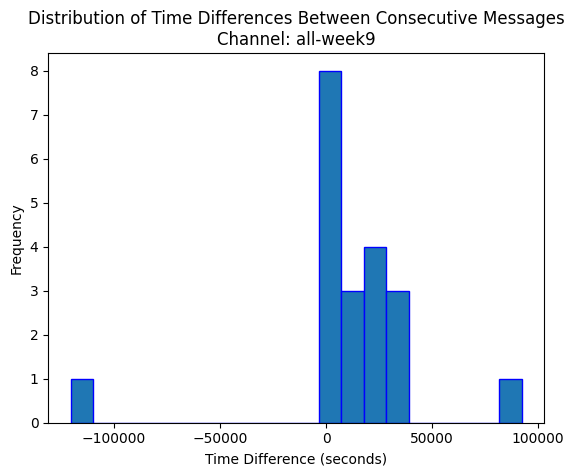

([['1667033190.398279', '1667037145.413989'], ['1667044397.584759', '1667064547.183749'], ['1666781561.703899', '1666787430.816379'], ['1666792217.193079', '1666792973.694019'], ['1666808555.238339', '1666869324.883659'], ['1666604983.259629', '1666605178.774259'], ['1666683658.791009', '1666685293.984789'], ['1666690572.798599', '1666694643.716889'], ['1666709421.082999', '1666710198.029679'], ['1666711072.693219', '1666716858.964429'], ['1666716278.345249', '1666716329.279809'], ['1666716963.564009', '1666718293.083069'], ['1666716985.319519', '1666727176.744859'], ['1666979106.352069', '1666979451.598889'], ['1666980254.844169', '1666981879.341879'], ['1666981708.660739', '1666982036.203519'], ['1666854372.612749', '1666854476.367009'], ['1666857887.703449', '1666858435.955669'], ['1666858629.076399', '1666944753.417749'], ['1666860567.673869', '1666861520.441829'], ['1666868091.544359', '1666869829.176069'], ['1666872047.490459', '1666872076.934649'], ['1666873957.265369', '1666874

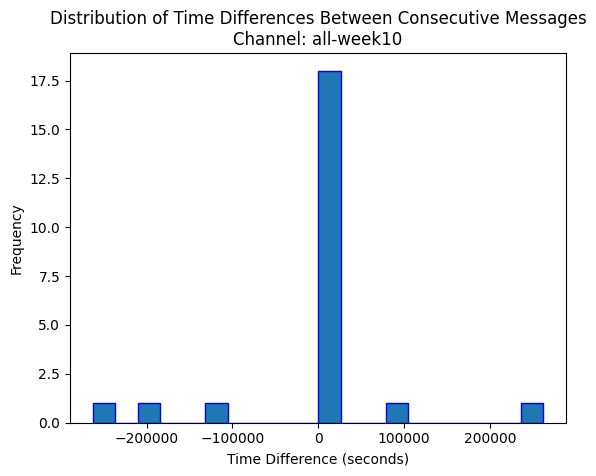

([['1667719877.027419', '1667720246.450499'], ['1667807598.812679', '1667814272.120119'], ['1667813655.905889', '1667814342.646599'], ['1667632616.826989', '1667636143.329179'], ['1667638865.178799', '1667639914.077079'], ['1667658849.709509', '1667662252.569179'], ['1667667815.891029', '1667671305.849469'], ['1667674923.137399', '1667676278.781939'], ['1667711863.622629', '1667714693.685889'], ['1667476981.200559', '1667477081.619969'], ['1667494328.148249', '1667564000.453459'], ['1667300815.573139', '1667317176.278649'], ['1667300941.923309', '1667301268.158959'], ['1667301647.003249', '1667302974.970889'], ['1667302671.394459', '1667303408.666039'], ['1667303702.889339', '1667313161.613869'], ['1667303750.550359', '1667303811.266439'], ['1667303896.524659', '1667306484.563839'], ['1667304072.917079', '1667305017.322899'], ['1667328079.203129', '1667328650.332419'], ['1667329460.686899', '1667335206.321319'], ['1667331156.237649', '1667331574.924019'], ['1667234008.113589', '1667238

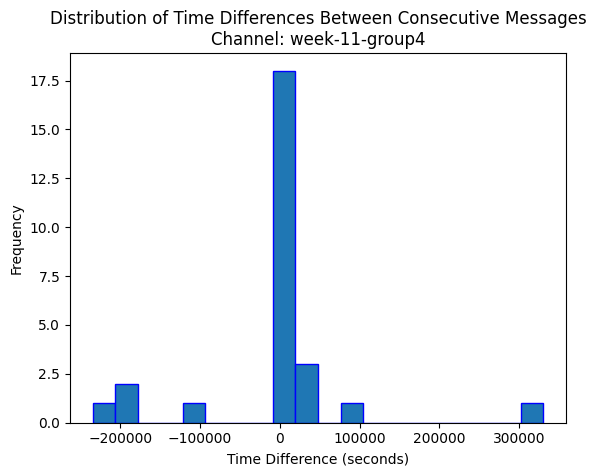

([['1666944940.421249', '1666945722.324919'], ['1666946593.641509', '1666954858.617579'], ['1666952436.492989', '1666952548.910759']], 36)


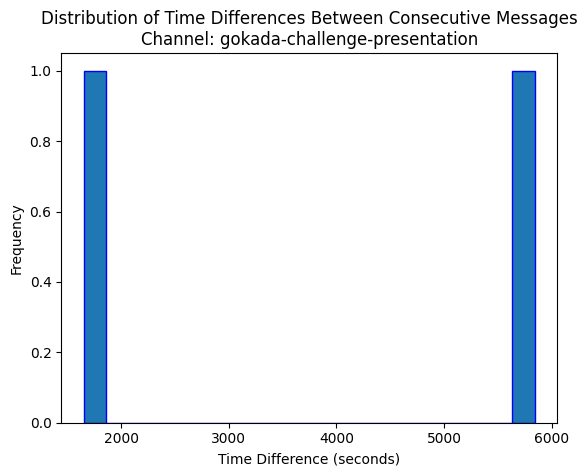

([['1667755081.141899', '1667755299.237669'], ['1667462569.136749', '1667463760.240449'], ['1667467258.003679', '1667479305.796549'], ['1667487883.346659', '1667487938.968839'], ['1667487979.950889', '1667496344.734289'], ['1667507343.705019', '1667516589.295069'], ['1667508158.707789', '1667508444.316549'], ['1667510800.246489', '1667551518.703989'], ['1667295481.102109', '1667306066.095919'], ['1667298901.562679', '1667300512.507129'], ['1667304795.651579', '1667305147.357379'], ['1667322256.188769', '1667337857.742229'], ['1667332766.445499', '1667361881.091999'], ['1667201237.341759', '1667203548.662819'], ['1667201629.921879', '1667202100.232259'], ['1667207915.069769', '1667218258.808109'], ['1667214002.033569', '1667214373.641179'], ['1667220190.061329', '1667222639.256639'], ['1667378470.103169', '1667405571.951639'], ['1667385193.817339', '1667392229.895539'], ['1667393146.949759', '1667393960.476469'], ['1667408389.539619', '1667414408.897029'], ['1667409965.352549', '1667420

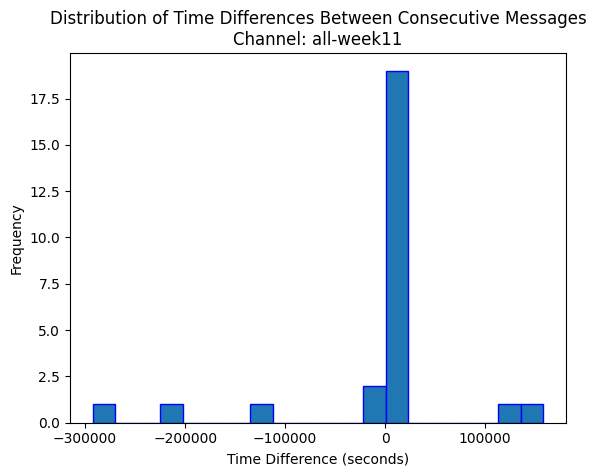

([['1667743705.443989', '1667754893.943609'], ['1667754992.651869', '1667757581.015329'], ['1667757085.361129', '1667757099.735039'], ['1667758289.020619', '1667758434.480909'], ['1667809125.814179', '1667809299.143789'], ['1667809206.657799', '1667809405.386749'], ['1667809605.962019', '1667809665.526069'], ['1667809727.354749', '1667809742.194069'], ['1667809757.338079', '1667810551.955619'], ['1667812704.733909', '1667814165.186449'], ['1667812810.068659', '1667813624.283909'], ['1667469055.785479', '1667474458.892639'], ['1667473974.166929', '1667477324.262989'], ['1667480021.596319', '1667480074.200249'], ['1667480026.662159', '1667481555.799989'], ['1667496778.934179', '1667498335.788619'], ['1667496843.357369', '1667498639.460059'], ['1667509854.822959', '1667541821.478229'], ['1667540937.440189', '1667546557.503759'], ['1667298181.101649', '1667300045.633169'], ['1667300365.381659', '1667301837.598349'], ['1667300691.343649', '1667300724.565789'], ['1667301111.975019', '1667301

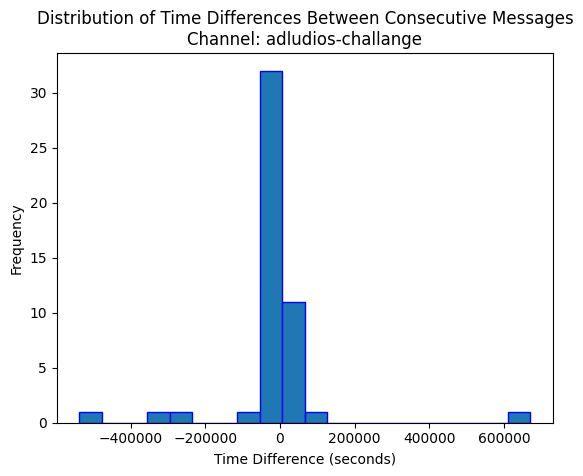

([['1667300183.451329', '1667300262.020199'], ['1667307915.779729', '1667316267.464119'], ['1667320787.640759', '1667322945.294969'], ['1667243662.856189', '1667280497.691979'], ['1667280187.867549', '1667280584.476359'], ['1667280587.659659', '1667280752.188789'], ['1667280627.847919', '1667289550.876479'], ['1667412165.869719', '1667458544.760429'], ['1667568314.731399', '1667664177.090949']], 99)


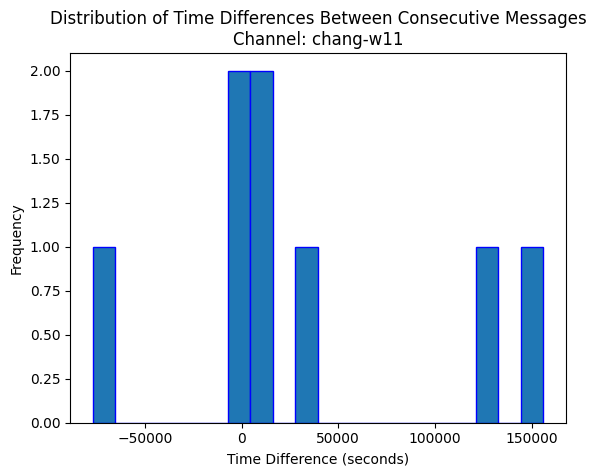

([['1668238822.775769', '1668249288.668229'], ['1668148124.724559', '1668148779.895049']], 17)


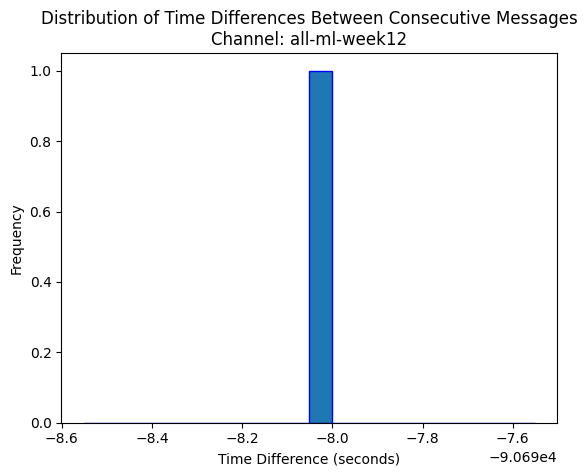

([], 25)


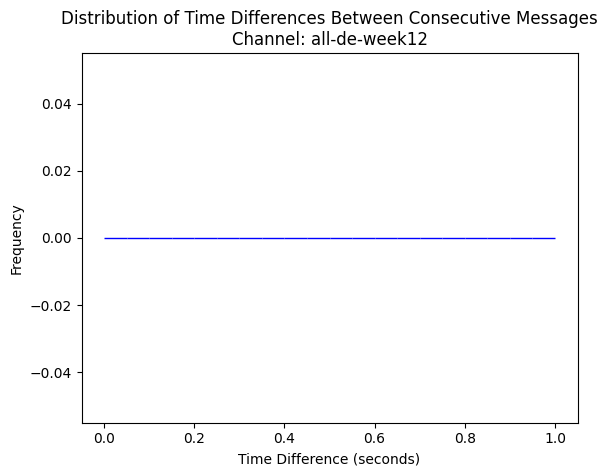

([['1668238555.900829', '1668238742.488269'], ['1667820880.607259', '1667824574.375099'], ['1667831518.280939', '1667831802.415459'], ['1667833875.288709', '1667835382.576969'], ['1668090991.470289', '1668100415.828559'], ['1667981002.124979', '1667981431.024579'], ['1667982252.781309', '1667982517.318899'], ['1667982717.568899', '1667998103.156509'], ['1667983478.117529', '1667983514.895249'], ['1667986101.898309', '1667991029.899469']], 115)


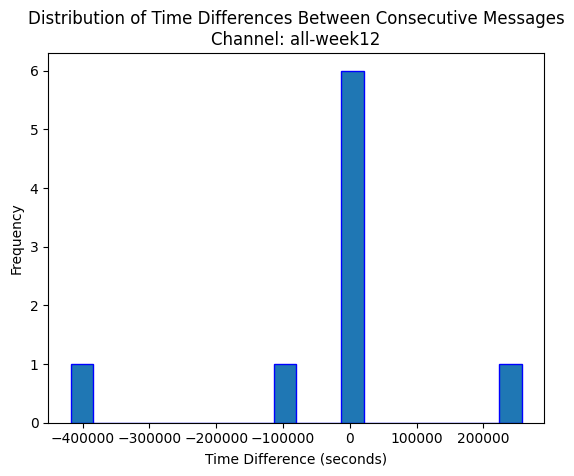

([], 9)


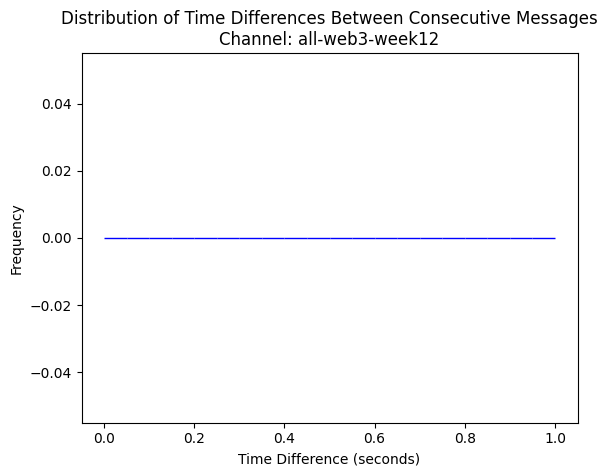

([], 19)


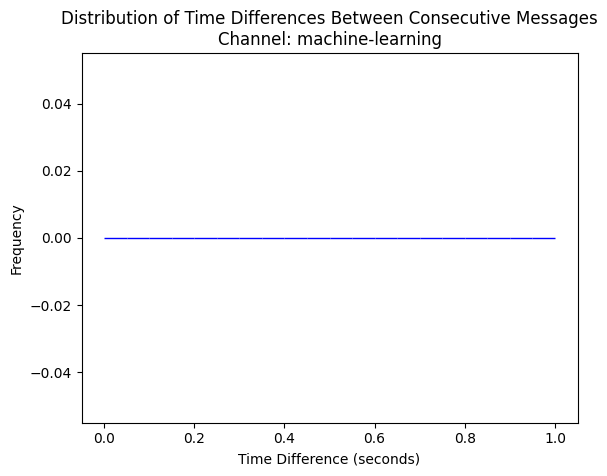

([], 39)


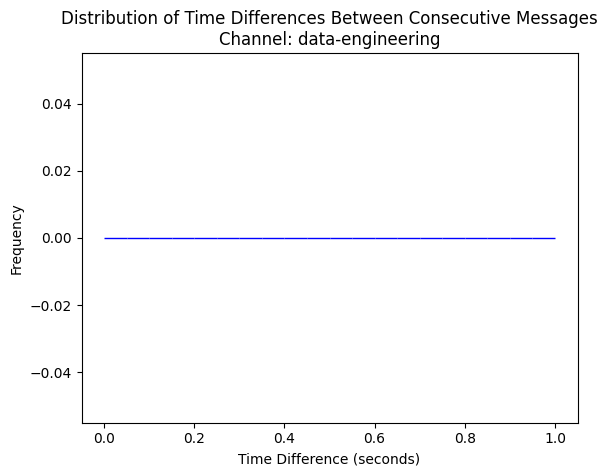

In [13]:
# Distribution difference between consecutive messages in each channels

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

for channel in channels_data:
    path_channel = f"../dataset/{channel['name']}"
    time_differences = []

    stamps, _ = get_messages_reply_timestamp_from_channel(path_channel)
    print(get_messages_reply_timestamp_from_channel(path_channel))
    # Calculate time differences between consecutive messages
    for i in range(1, len(stamps)):
        prev_msg_timestamp = float(stamps[i-1][0])
        curr_msg_timestamp = float(stamps[i][0])
        time_difference = curr_msg_timestamp - prev_msg_timestamp
        time_differences.append(time_difference)

    # Plot histogram of time differences for the current channel
    plt.hist(time_differences, bins=20, edgecolor='blue')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Time Differences Between Consecutive Messages\nChannel: {channel["name"]}')
    plt.show()

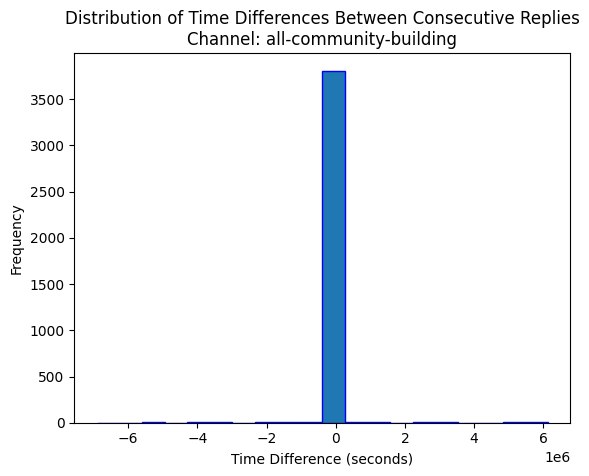

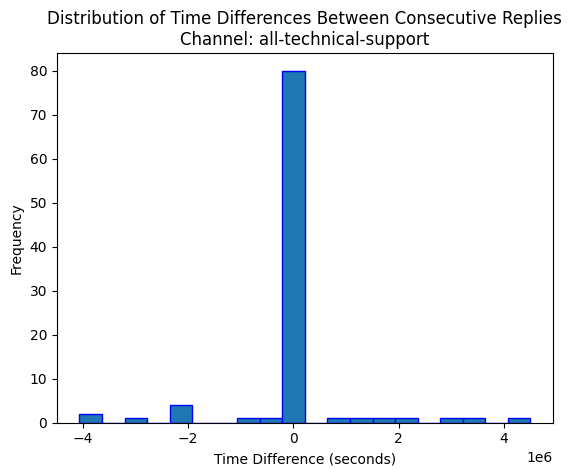

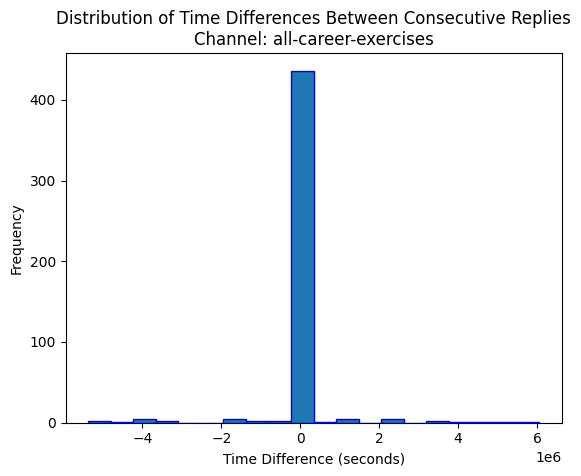

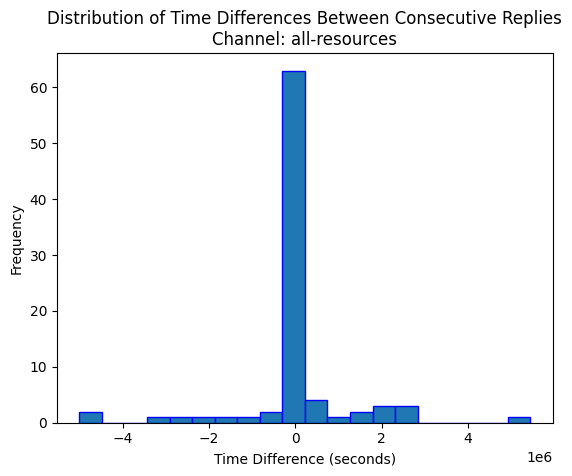

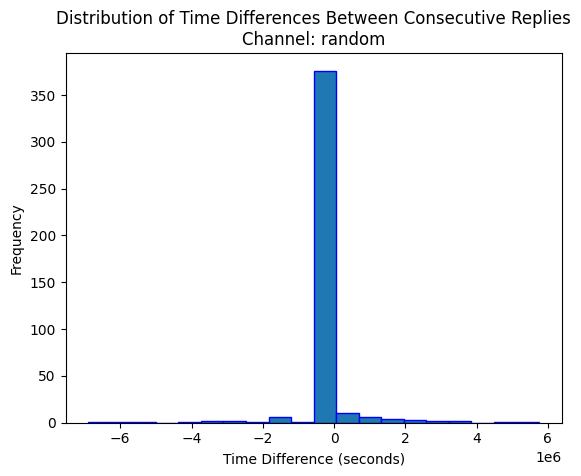

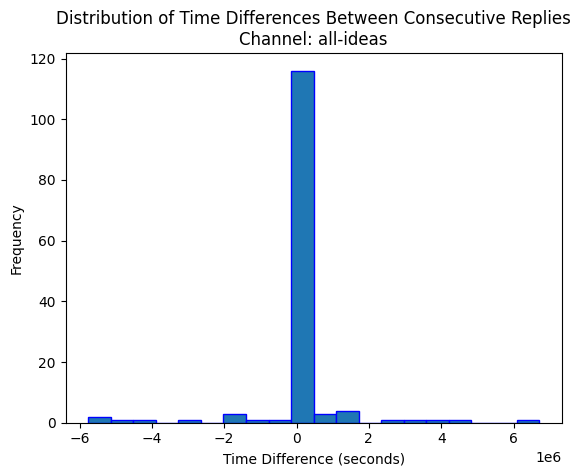

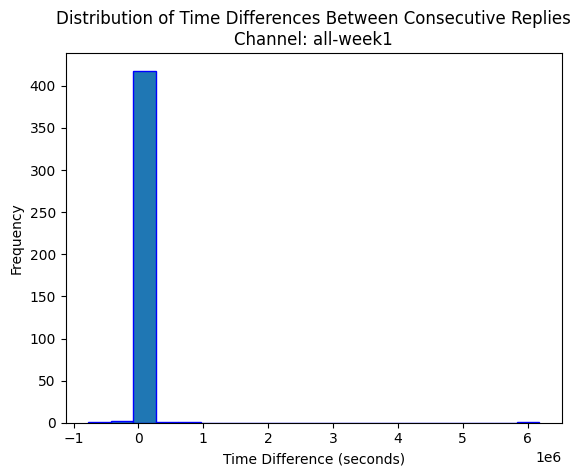

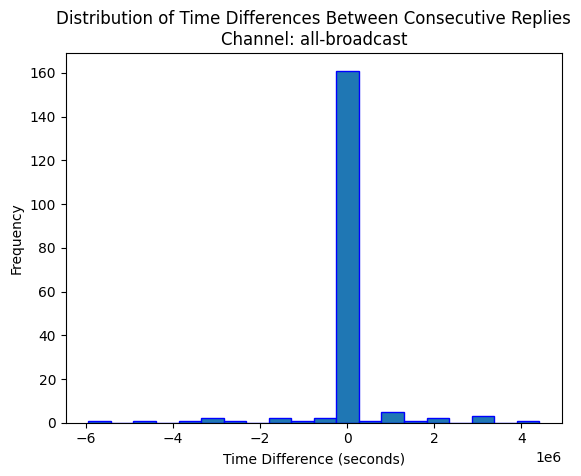

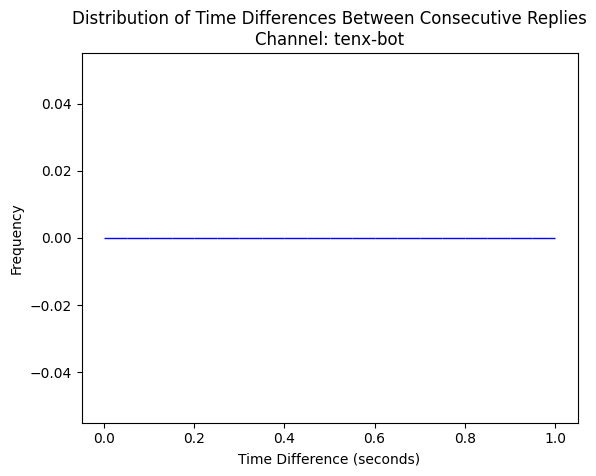

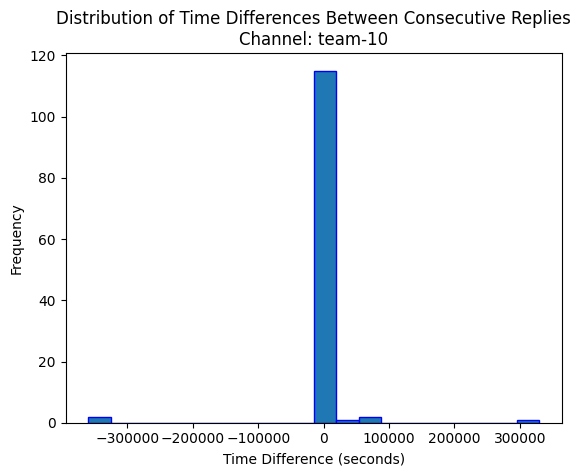

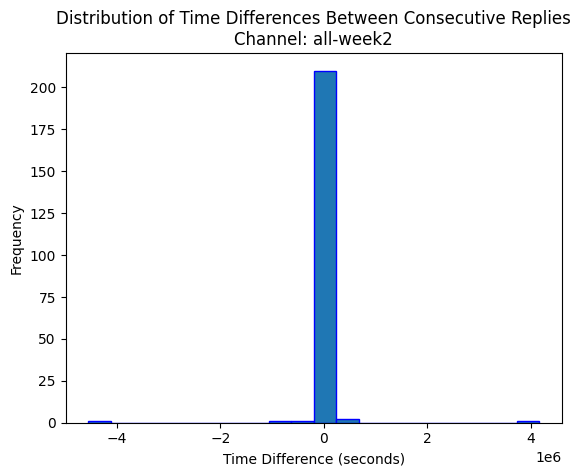

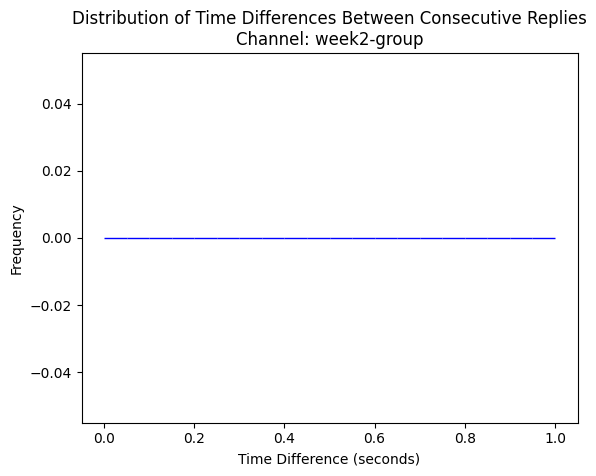

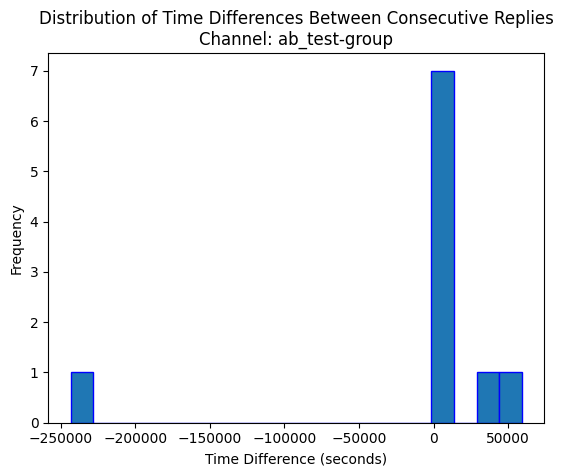

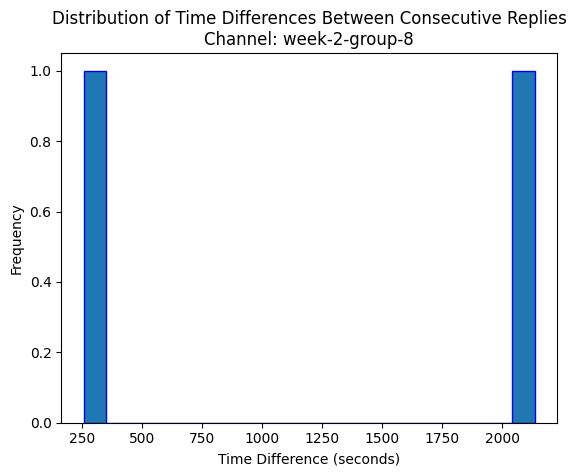

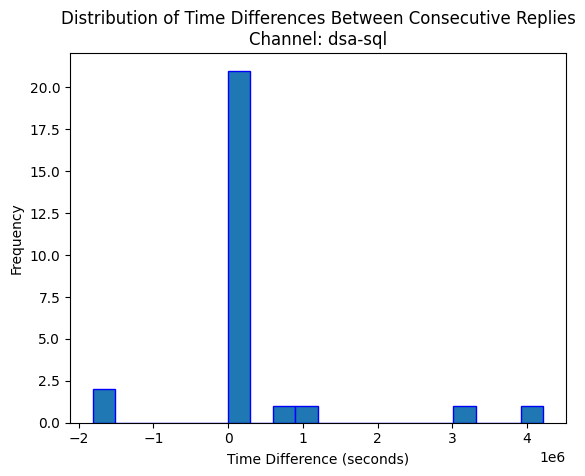

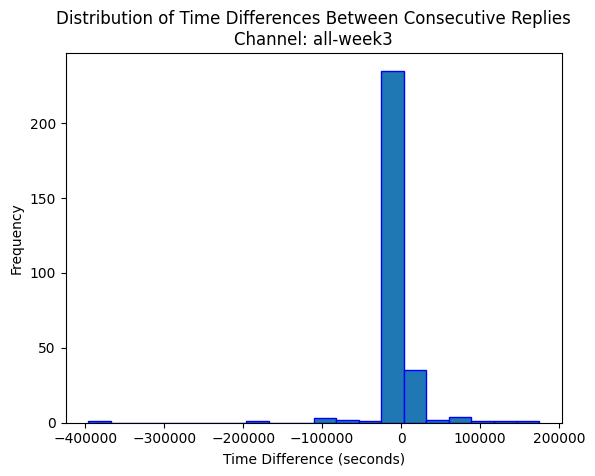

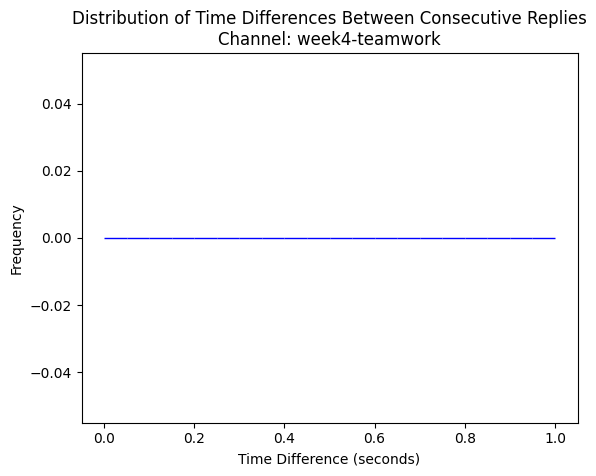

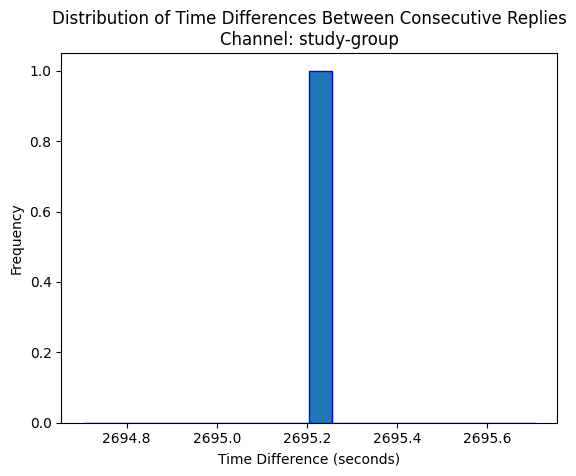

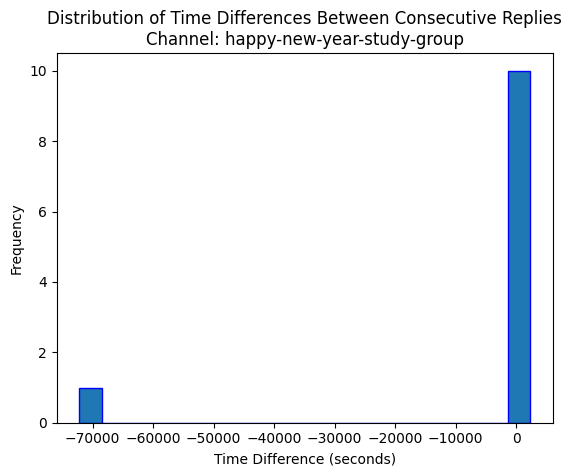

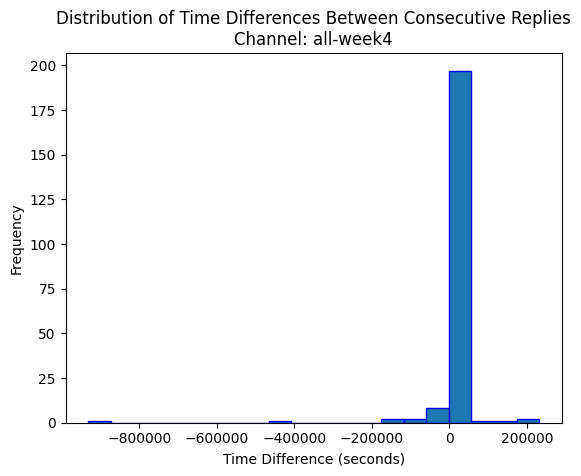

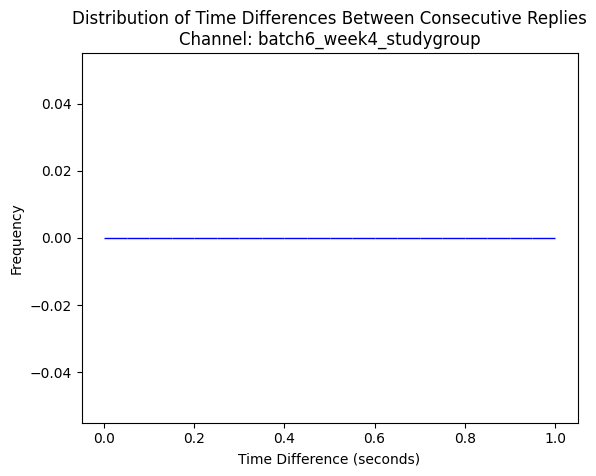

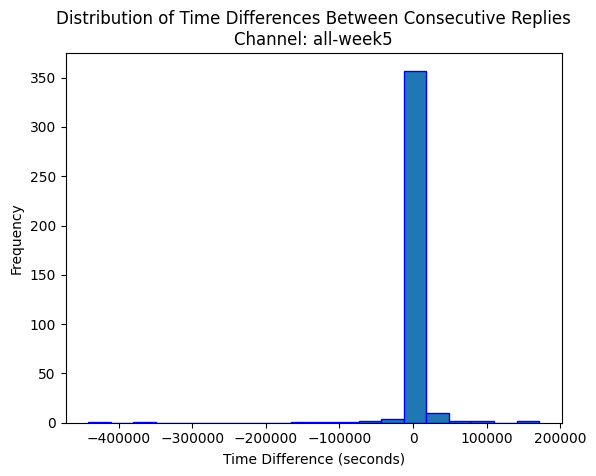

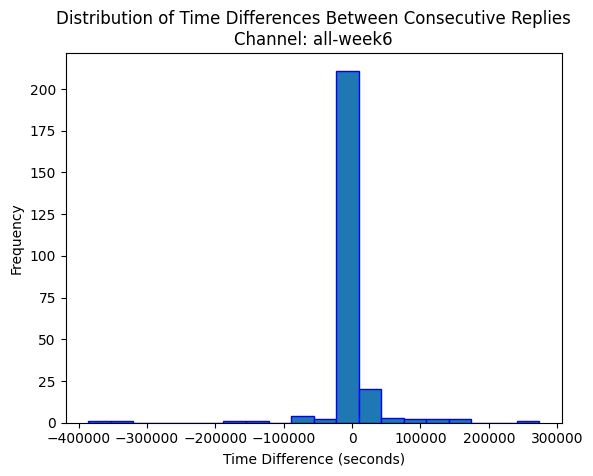

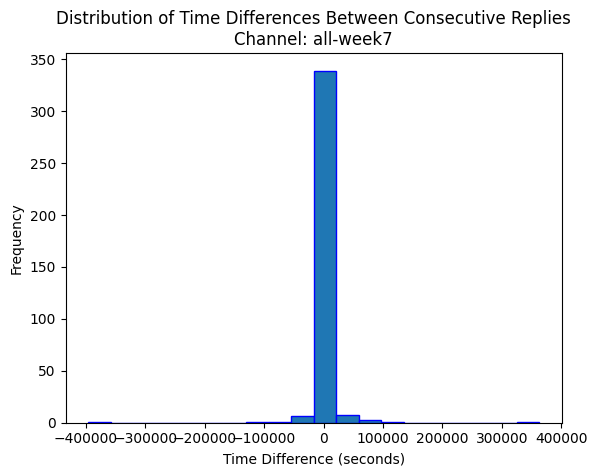

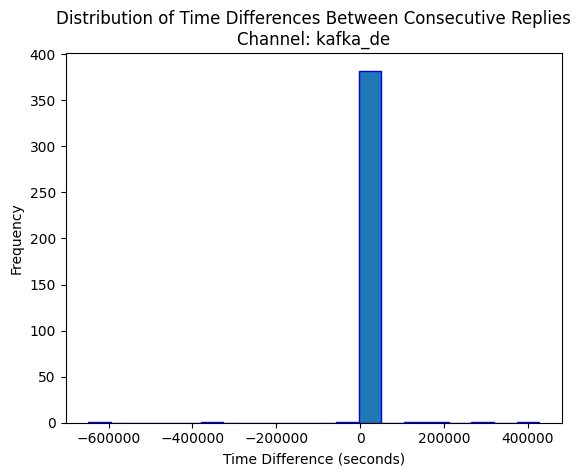

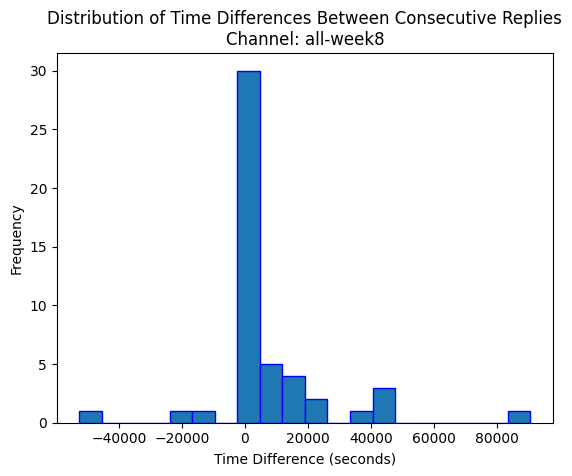

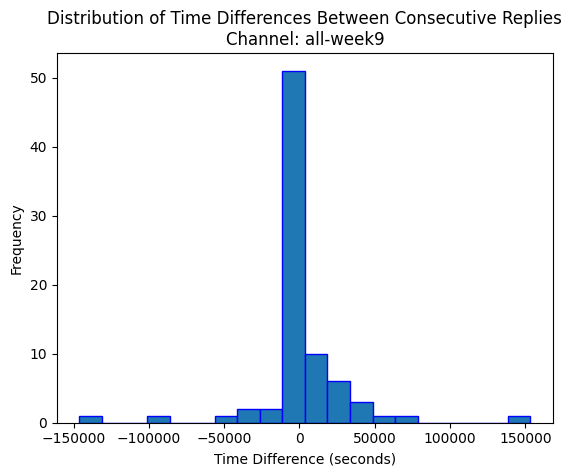

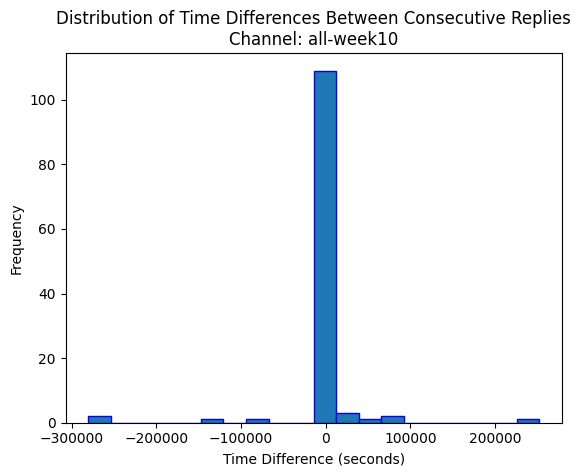

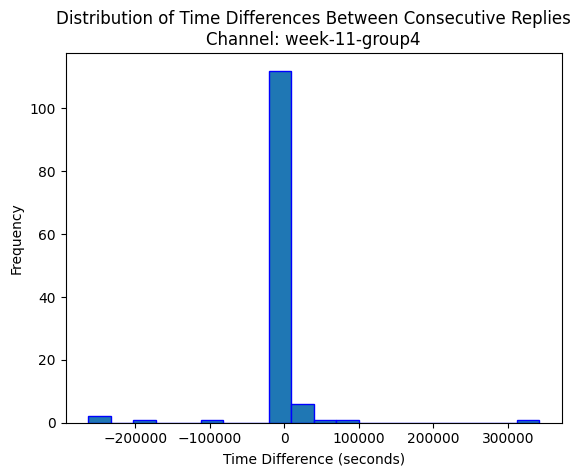

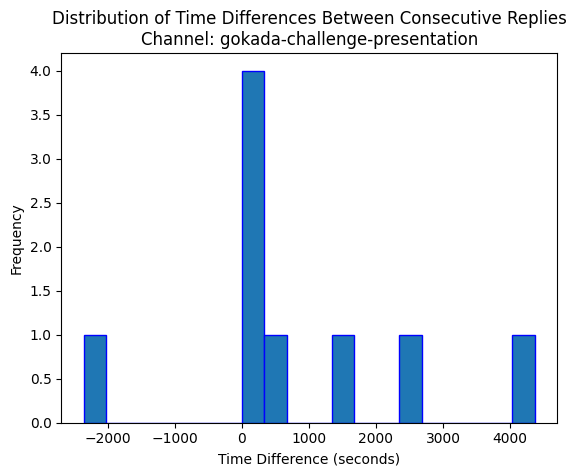

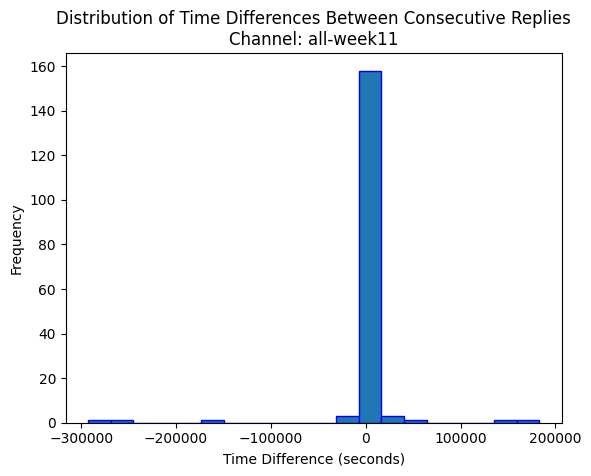

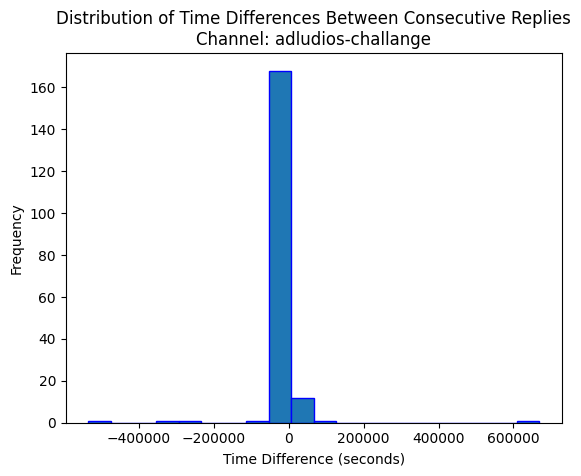

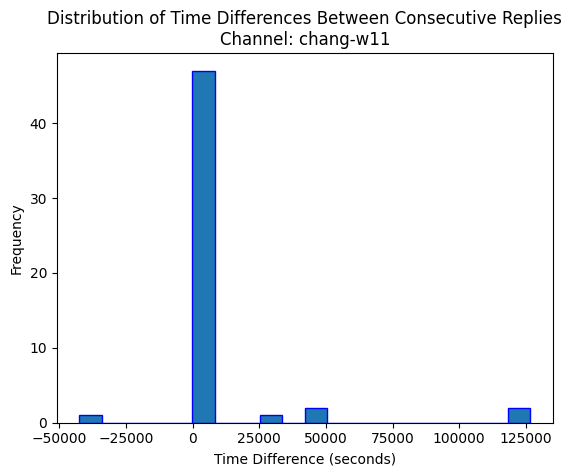

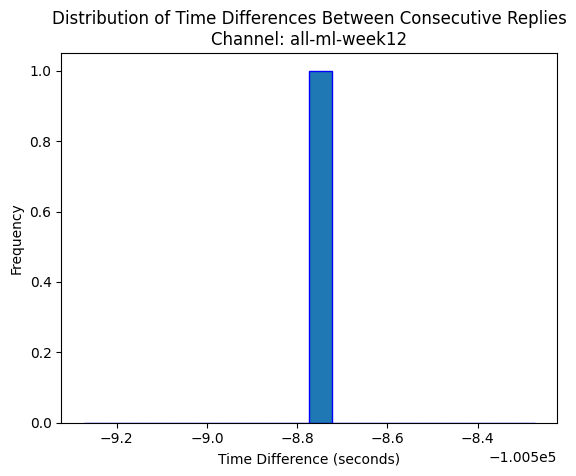

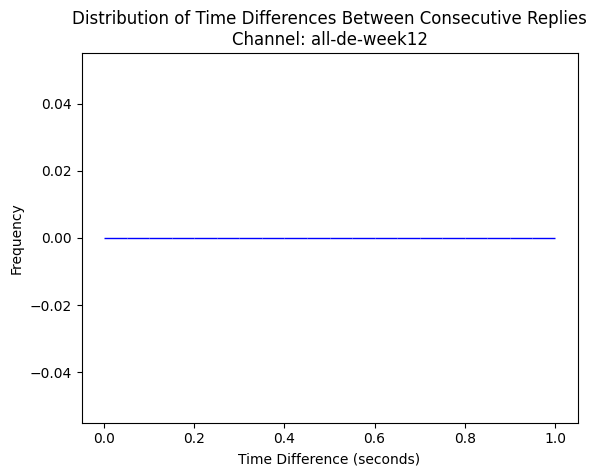

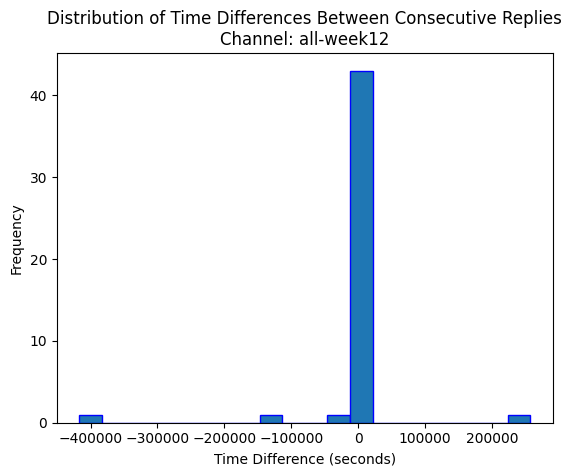

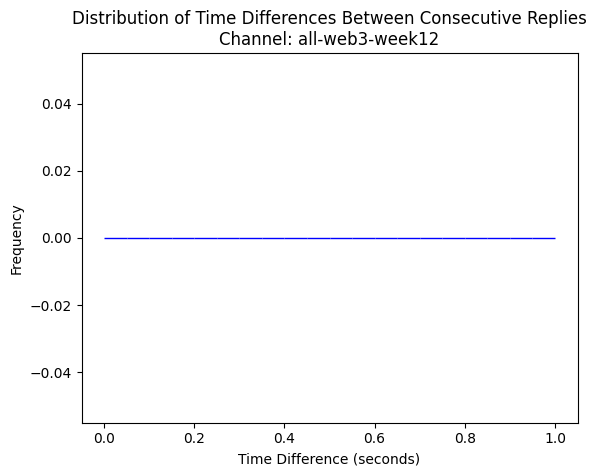

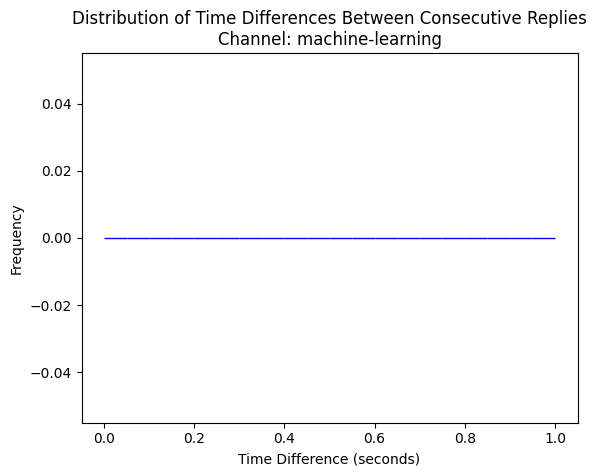

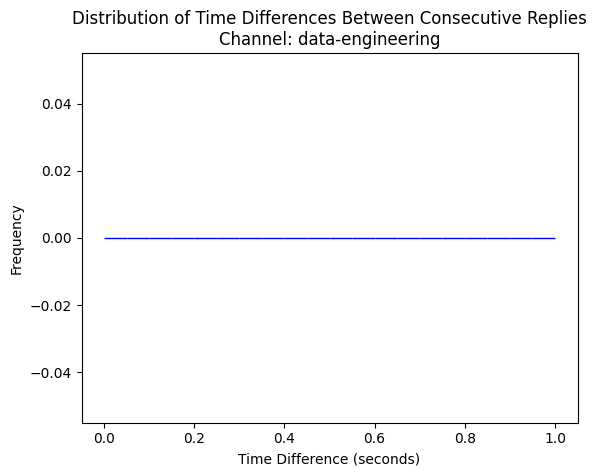

In [10]:
# Distribution difference between consecutive replies in each channels

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

for channel in channels_data:
    path_channel = f"../dataset/{channel['name']}"
    reply_timestamps = get_channel_messages_replies_timestamp(path_channel)

    # Convert timestamps to datetime objects
    datetime_timestamps = [datetime.fromtimestamp(float(timestamp)) for timestamp in reply_timestamps]

    # Calculate time differences between consecutive replies
    time_differences = np.diff(datetime_timestamps)

    # Convert time differences to seconds
    time_differences_seconds = [td.total_seconds() for td in time_differences]

    # Plot histogram of time differences for the current channel
    plt.hist(time_differences_seconds, bins=20, edgecolor='blue')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Time Differences Between Consecutive Replies\nChannel: {channel["name"]}')
    plt.show()

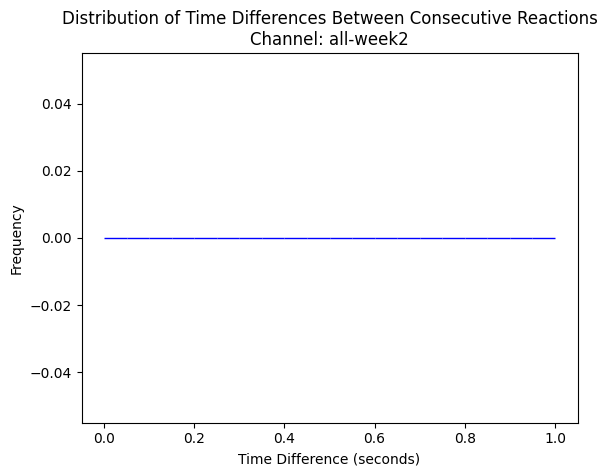

In [11]:
# Distribution difference between consecutive messages in each channels
# but since we dont have 'ts' for reaction its straight line


data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

# for channel in channels_data:
#check it just for one channel

path_channel = f"../dataset/all-week2"
reaction_timestamps = find_reaction_timestamps(path_channel)
datetime_timestamps = [datetime.fromtimestamp(float(timestamp)) for timestamp in reaction_timestamps]

# Calculate time differences between consecutive reactions
time_differences = np.diff(datetime_timestamps)

# Convert time differences to seconds
time_differences_seconds = [td.total_seconds() for td in time_differences]

# Plot histogram of time differences for the current channel
plt.hist(time_differences_seconds, bins=20, edgecolor='blue')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Time Differences Between Consecutive Reactions\nChannel: all-week2')
plt.show()


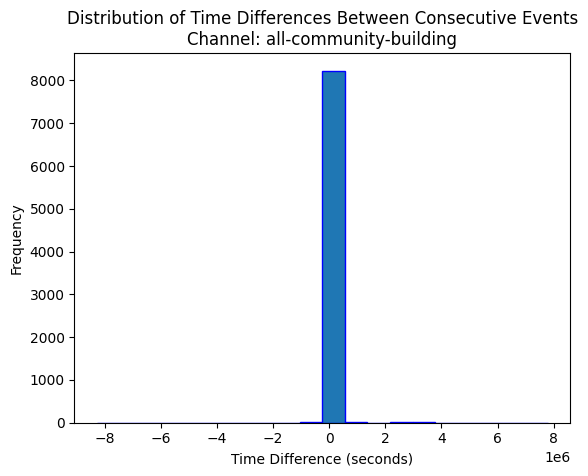

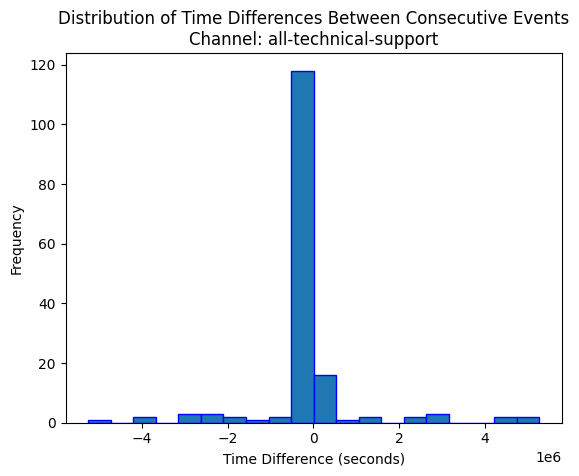

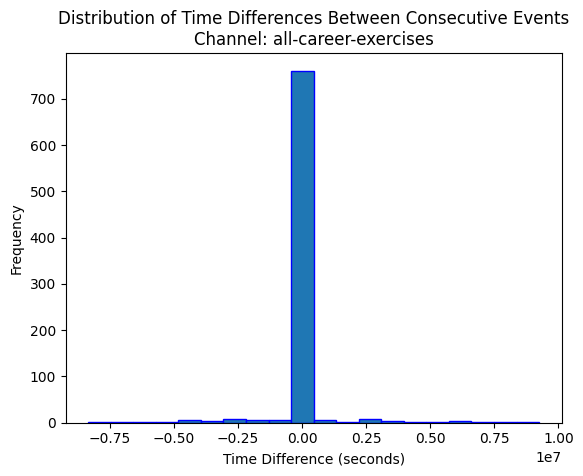

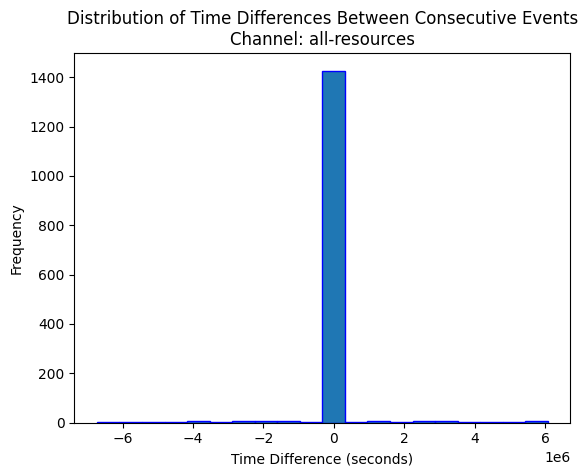

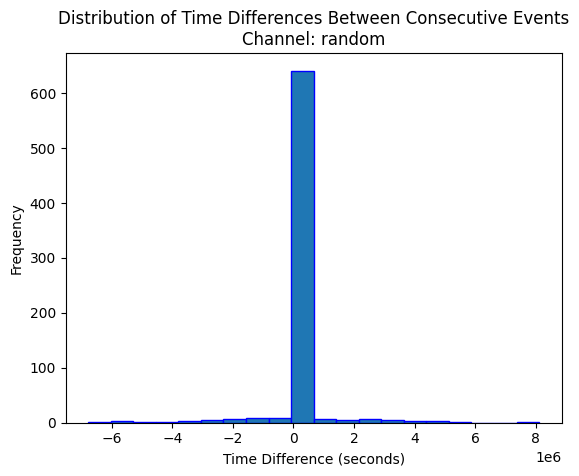

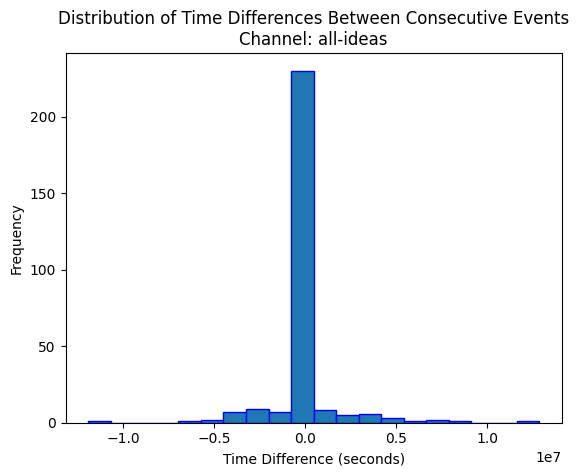

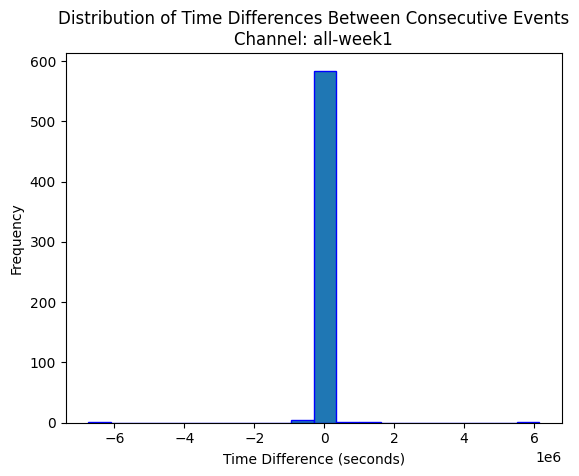

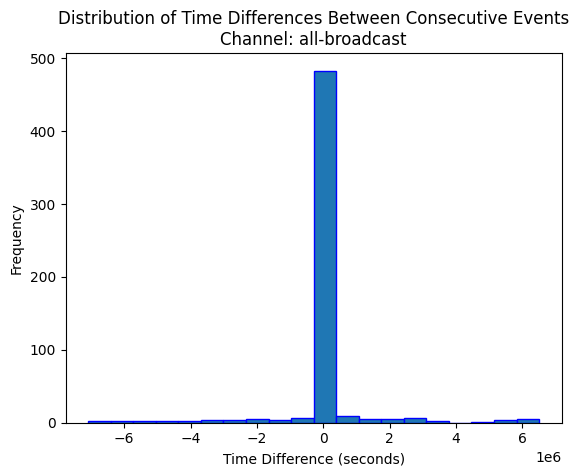

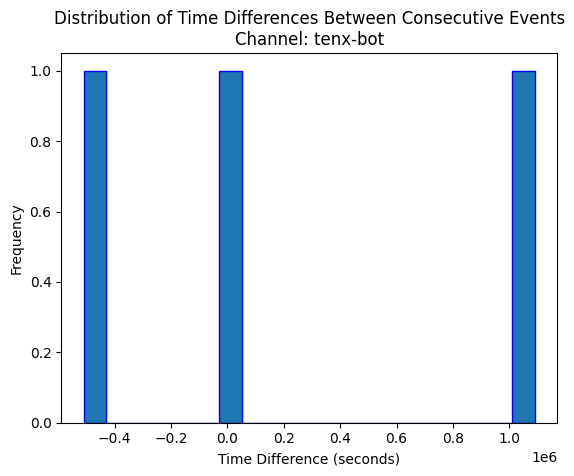

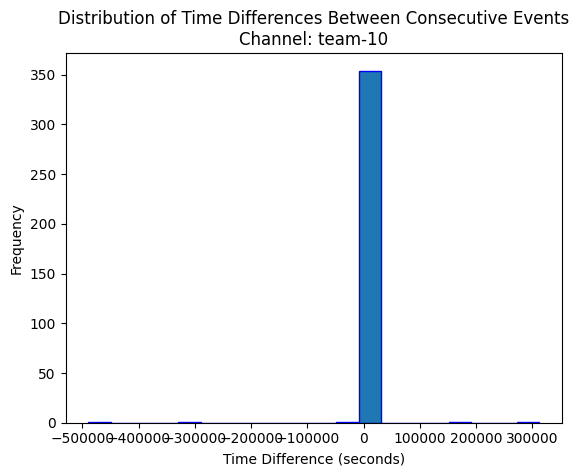

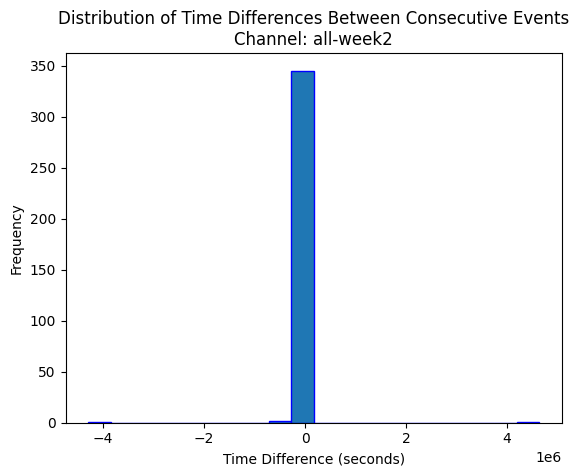

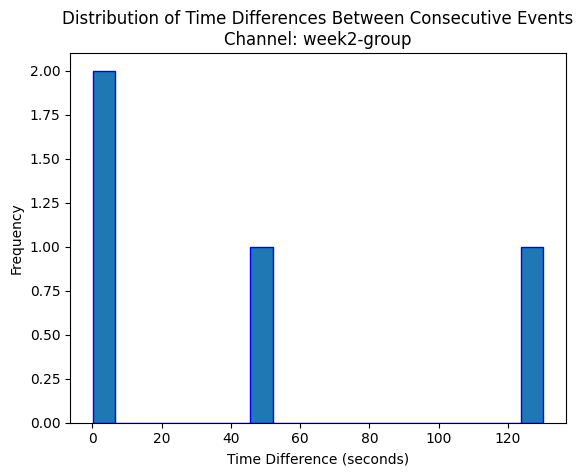

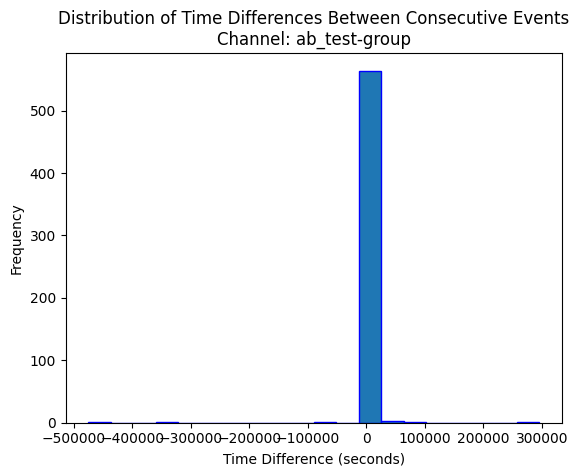

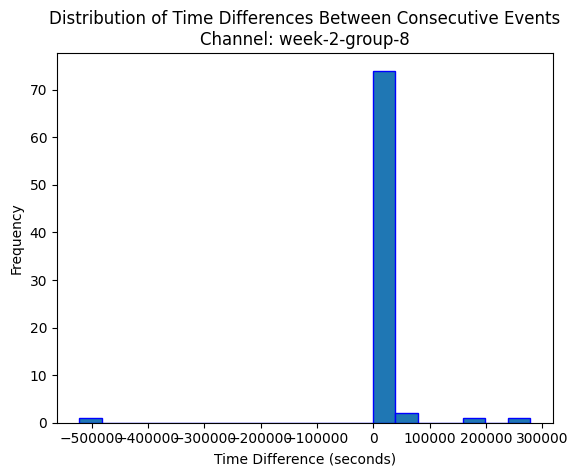

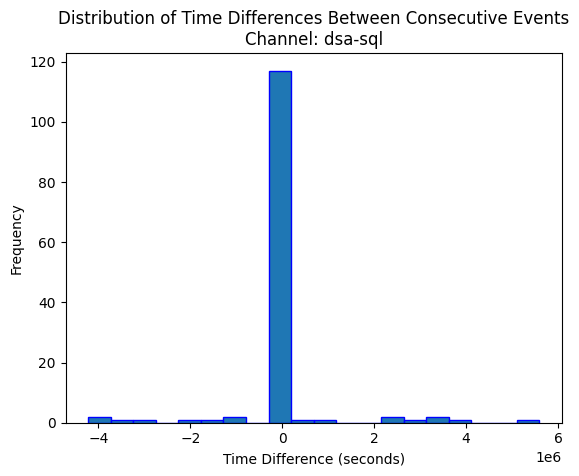

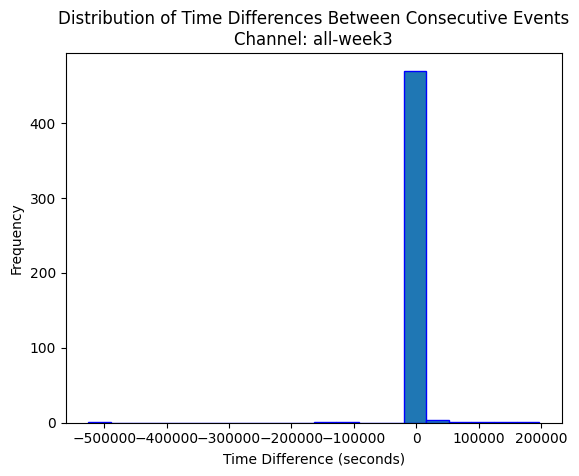

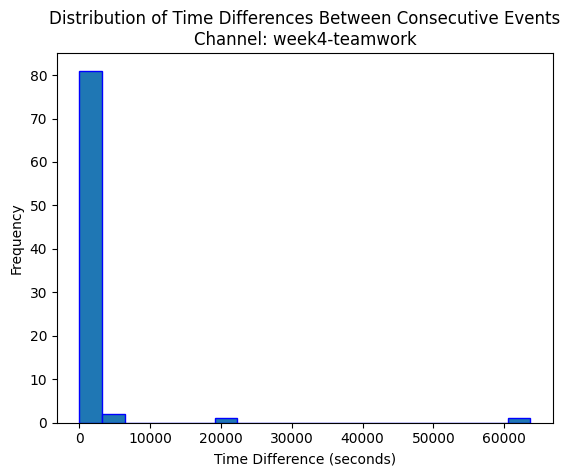

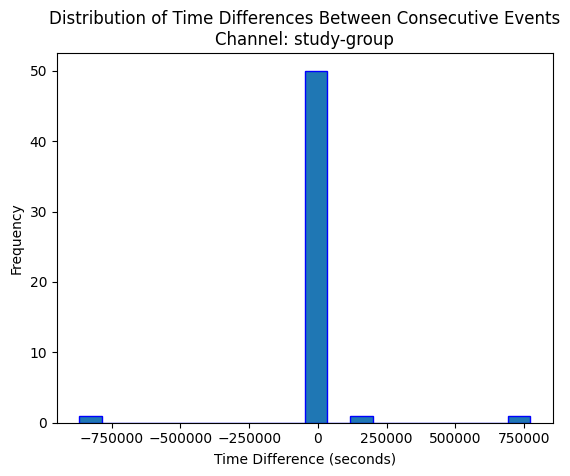

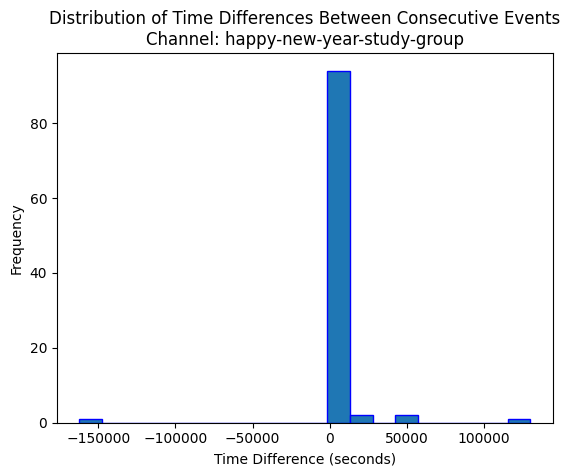

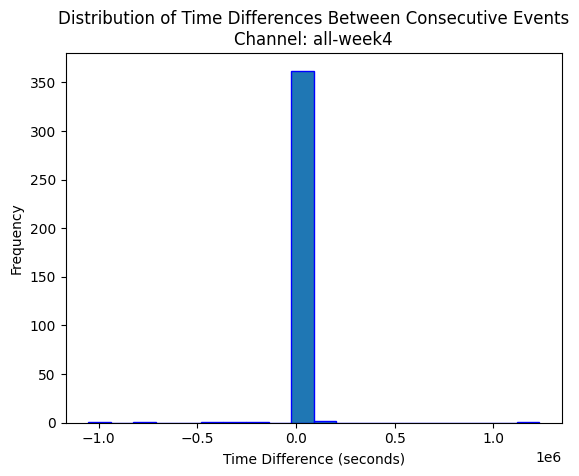

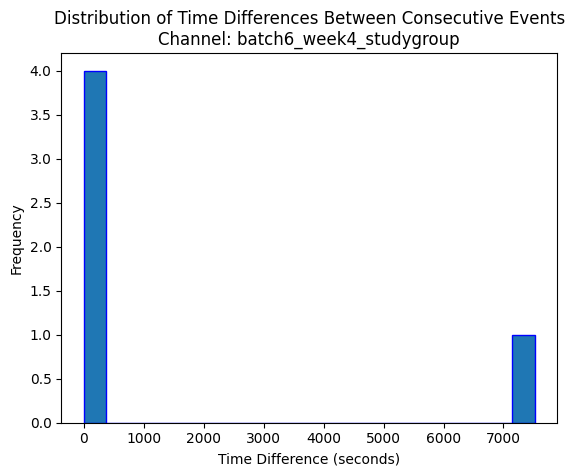

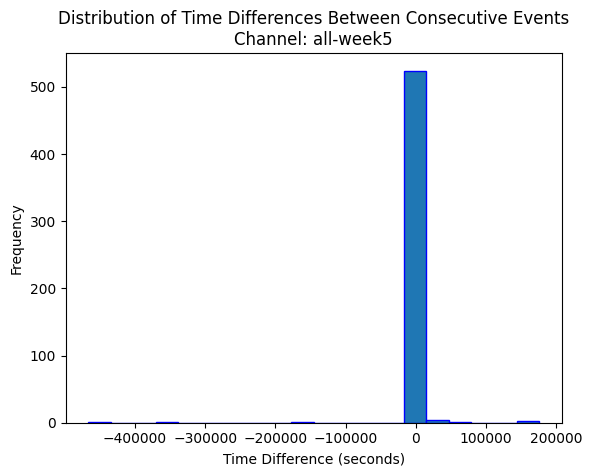

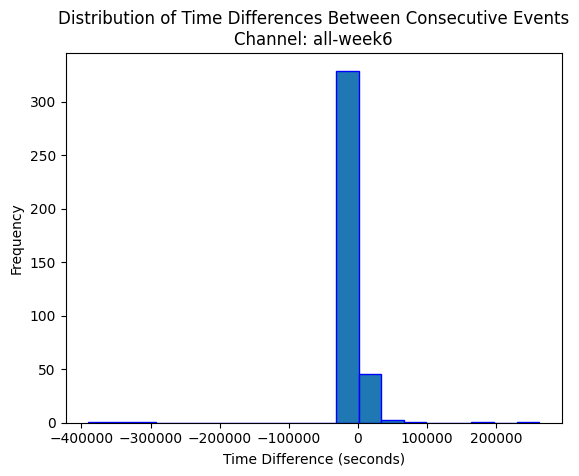

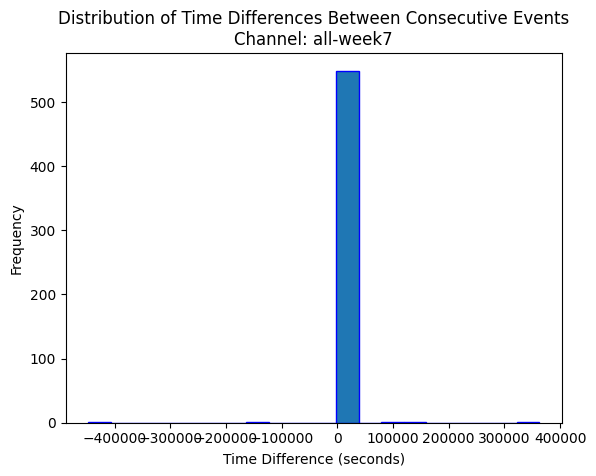

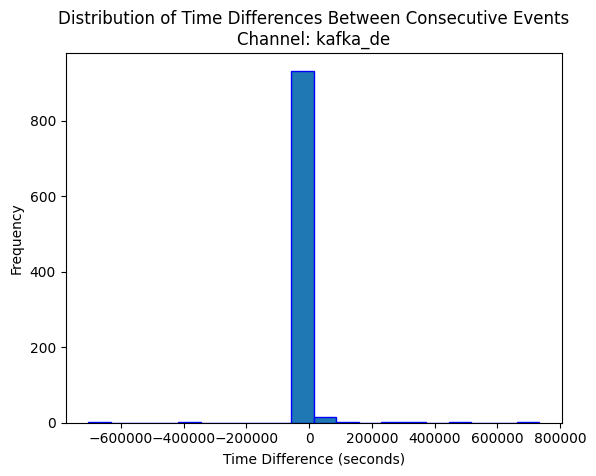

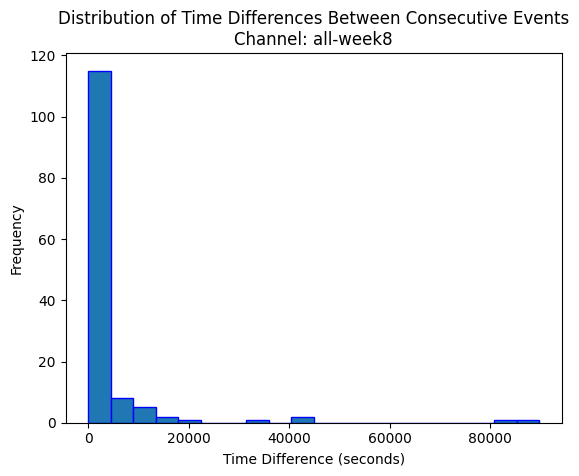

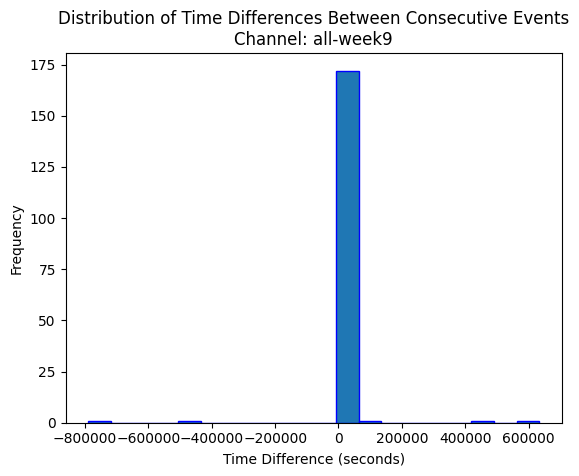

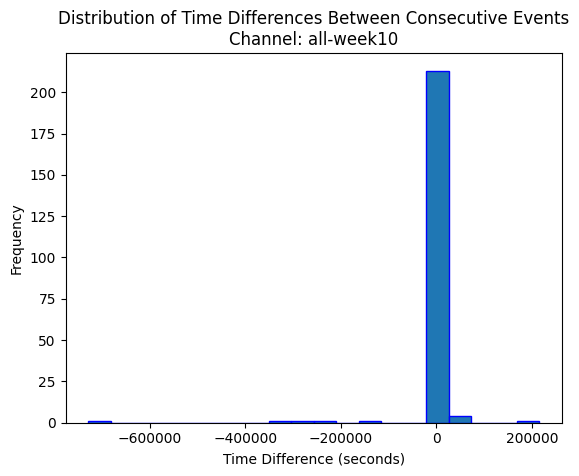

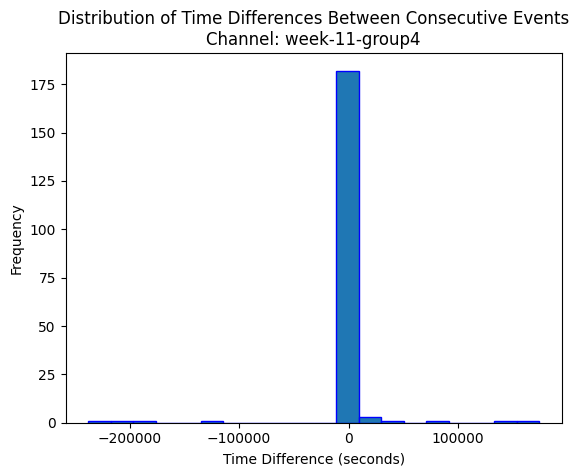

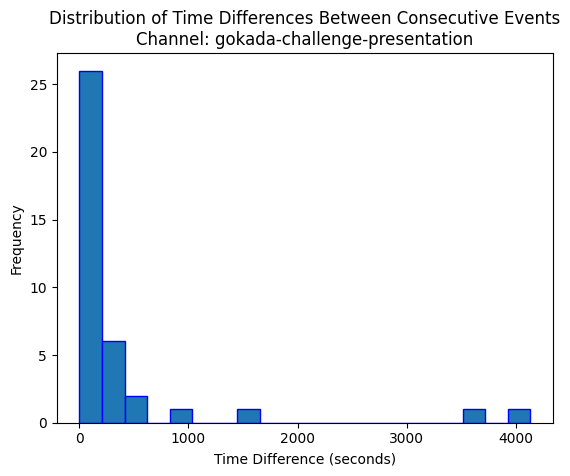

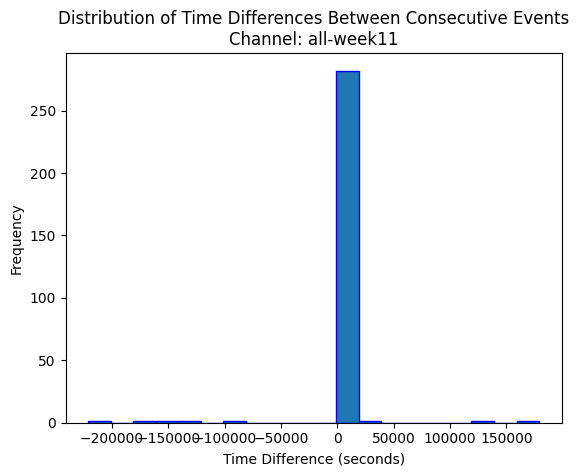

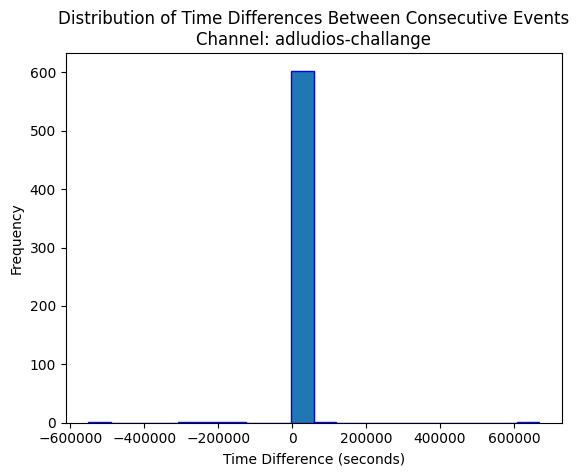

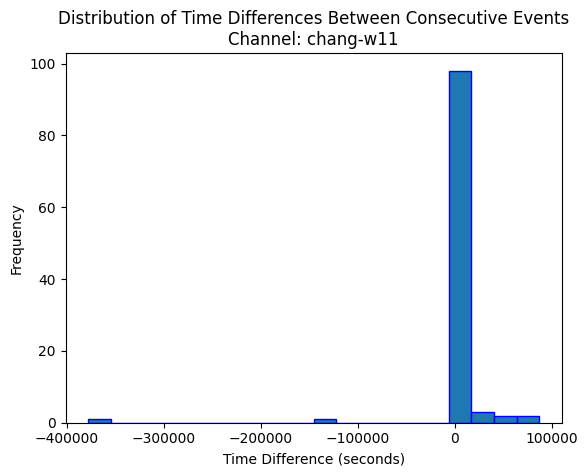

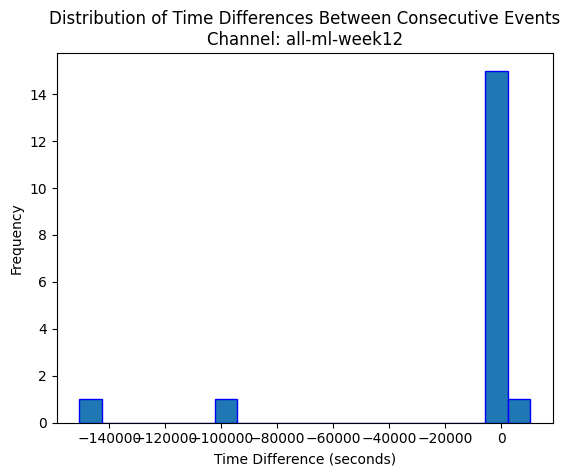

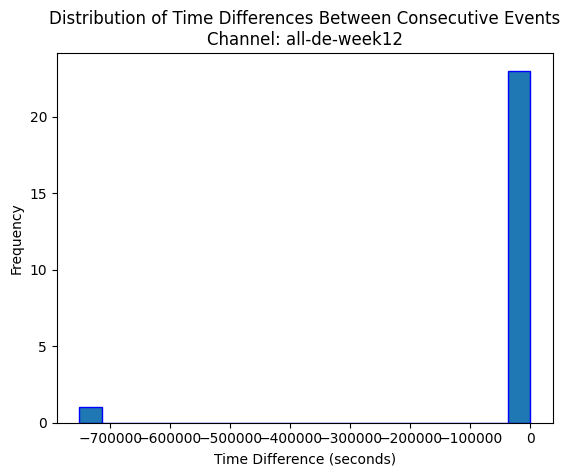

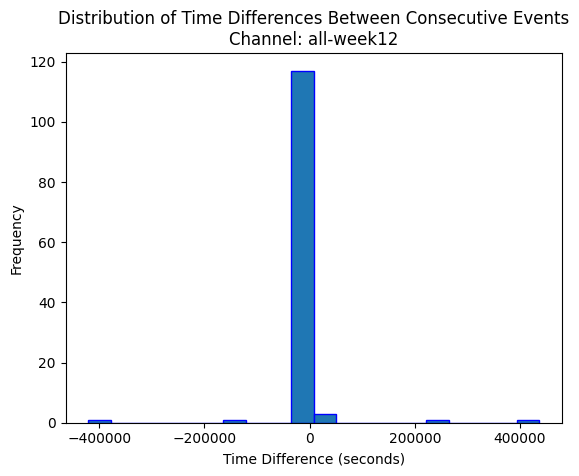

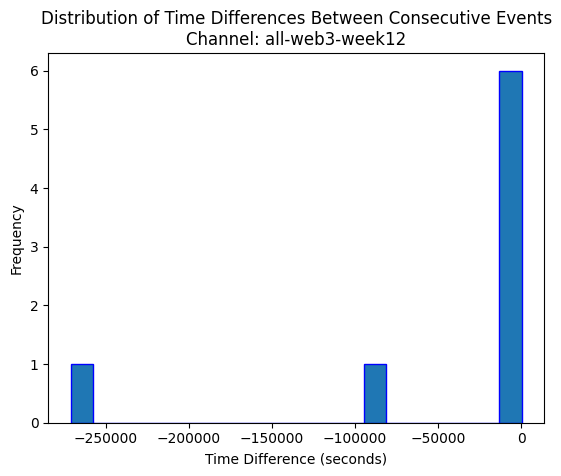

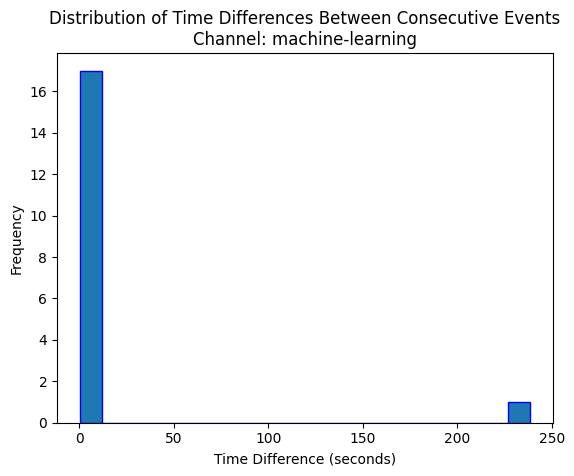

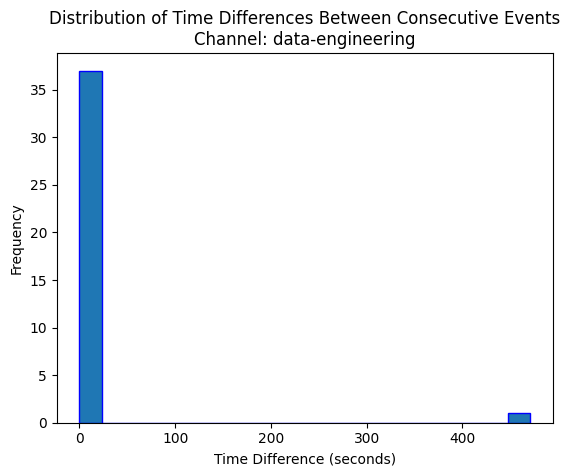

In [12]:
# Distribution difference between consecutive events in each channels

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

for channel in channels_data:
    
    path_channel = f"../dataset/{channel['name']}"
    event_timestamps = get_all_events_timestamp_on_channel(path_channel)
    datetime_timestamps = [datetime.fromtimestamp(float(timestamp)) for timestamp in event_timestamps]

    # Calculate time differences between consecutive reactions
    time_differences = np.diff(datetime_timestamps)
    # Convert time differences to seconds
    time_differences_seconds = [td.total_seconds() for td in time_differences]

    # Plot histogram of time differences for the current channel
    plt.hist(time_differences_seconds, bins=20, edgecolor='blue')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Time Differences Between Consecutive Events\nChannel: {channel["name"]}')
    plt.show()